<a href="https://colab.research.google.com/github/bruno774/doutorado/blob/main/cnn-classificador-peticoes/analise_exploratoria_sqlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina Aprendizagem Profunda
### Prof Josenalde Barbosa
### IMD/UFRN - PPgTI

Aluno: Bruno dos Santos F. Silva

##Análise Exploratória de Dados para Classificação de Processos Judiciais

Este notebook realiza uma análise exploratória completa de dados armazenados em dataset extraído de sistema processual, preparando-os para treinamento de modelos de aprendizado profundo.

## Objetivos:
- Conectar e explorar bases de dados SQLite3
- Analisar variáveis numéricas, categóricas e campos de texto
- Identificar problemas de qualidade de dados
- Preparar dados para modelos de redes neurais

## 1. Importação de Bibliotecas

In [35]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Configuração e Conexão ao Banco de Dados

In [36]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [37]:
DB_PATH = "/gdrive/MyDrive/Colab Notebooks/JFRN/split_dados_01.sqlite3" # ATENÇÃO: Altere 'seu_arquivo.db' para o nome real do seu arquivo SQLite
print(f"Caminho do banco de dados configurado para: {DB_PATH}")

Caminho do banco de dados configurado para: /gdrive/MyDrive/Colab Notebooks/JFRN/split_dados_01.sqlite3


In [38]:
# Configurar o caminho para o arquivo SQLite

# Verificar se o arquivo existe
if not Path(DB_PATH).exists():
    print(f"AVISO: Arquivo não encontrado em {DB_PATH}")
    print("Por favor, atualize o caminho do arquivo SQLite na variável DB_PATH")
else:
    print(f"Arquivo encontrado: {DB_PATH}")

Arquivo encontrado: /gdrive/MyDrive/Colab Notebooks/JFRN/split_dados_01.sqlite3


In [39]:
# Função para conectar ao banco de dados
def connect_to_db(db_path):
    try:
        conn = sqlite3.connect(db_path)
        print(f"Conexão estabelecida com sucesso!")
        return conn
    except sqlite3.Error as e:
        print(f"Erro ao conectar: {e}")
        return None

conn = connect_to_db(DB_PATH)

Conexão estabelecida com sucesso!


## 3. Exploração da Estrutura do Banco de Dados

In [40]:
# Listar todas as tabelas disponíveis
def list_tables(conn):
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    tables = pd.read_sql_query(query, conn)
    return tables

if conn:
    tables_df = list_tables(conn)
    print(f"Tabelas encontradas: {len(tables_df)}")
    print("\nLista de tabelas:")
    display(tables_df)

Tabelas encontradas: 3

Lista de tabelas:


,name
0,train
1,valid
2,test


In [41]:
# Explorar schema de cada tabela
def get_table_info(conn, table_name):
    query = f"PRAGMA table_info({table_name});"
    return pd.read_sql_query(query, conn)

if conn and not tables_df.empty:
    print("\n" + "="*80)
    print("ESTRUTURA DAS TABELAS")
    print("="*80)

    for table_name in tables_df['name']:
        print(f"\n📊 Tabela: {table_name}")
        schema = get_table_info(conn, table_name)
        display(schema)

        # Contar registros
        count_query = f"SELECT COUNT(*) as total FROM {table_name}"
        count = pd.read_sql_query(count_query, conn)['total'][0]
        print(f"Total de registros: {count:,}")


ESTRUTURA DAS TABELAS

📊 Tabela: train


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,id_processo_judicial,INTEGER,0,None,0
2,2,nr_processo_judicial,TEXT,0,None,0
3,3,dt_primeira_distribuicao,TEXT,0,None,0
4,4,in_tutela_antecipada,TEXT,0,None,0
5,5,nm_juizado,TEXT,0,None,0
6,6,ds_cidade,TEXT,0,None,0
7,7,codigo_assunto,TEXT,0,None,0
8,8,ds_assunto_judicial,TEXT,0,None,0
9,9,ds_complemento_assunto_judicial,TEXT,0,None,0


Total de registros: 165,499

📊 Tabela: valid


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,id_processo_judicial,INTEGER,0,None,0
2,2,nr_processo_judicial,TEXT,0,None,0
3,3,dt_primeira_distribuicao,TEXT,0,None,0
4,4,in_tutela_antecipada,TEXT,0,None,0
5,5,nm_juizado,TEXT,0,None,0
6,6,ds_cidade,TEXT,0,None,0
7,7,codigo_assunto,TEXT,0,None,0
8,8,ds_assunto_judicial,TEXT,0,None,0
9,9,ds_complemento_assunto_judicial,TEXT,0,None,0


Total de registros: 20,687

📊 Tabela: test


,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,id_processo_judicial,INTEGER,0,None,0
2,2,nr_processo_judicial,TEXT,0,None,0
3,3,dt_primeira_distribuicao,TEXT,0,None,0
4,4,in_tutela_antecipada,TEXT,0,None,0
5,5,nm_juizado,TEXT,0,None,0
6,6,ds_cidade,TEXT,0,None,0
7,7,codigo_assunto,TEXT,0,None,0
8,8,ds_assunto_judicial,TEXT,0,None,0
9,9,ds_complemento_assunto_judicial,TEXT,0,None,0


Total de registros: 20,688


## 4. Carregamento e Visualização Inicial dos Dados

In [42]:
# Selecionar a tabela principal para análise
# AJUSTE ESTA VARIÁVEL COM O NOME DA SUA TABELA
TABLE_NAME = tables_df['name'][0] if not tables_df.empty else "sua_tabela"

print(f"Analisando a tabela: {TABLE_NAME}")
print("\nSe desejar analisar outra tabela, altere a variável TABLE_NAME acima.")

Analisando a tabela: train

Se desejar analisar outra tabela, altere a variável TABLE_NAME acima.


In [43]:
# Carregar dados da tabela
if conn:
    query = f"SELECT * FROM {TABLE_NAME}"
    df = pd.read_sql_query(query, conn)

    pd.set_option('display.max_columns', None)  # No column limit
    pd.set_option('display.width', None)        # No line wrapping
    pd.set_option('display.max_colwidth', None) # Show full column content

    print(f"Dados carregados: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
    print("\nPrimeiras linhas:")
    display(df.head(10))

Dados carregados: 165,499 linhas x 28 colunas

Primeiras linhas:


index  id_processo_judicial       nr_processo_judicial  \
0  178672                475347  0501383-21.2019.4.05.8404   
1   37083                256155  0501266-12.2014.4.05.8402   
2    1247                 97537  0500434-21.2010.4.05.8401   
3   57386                286586  0501512-74.2015.4.05.8401   
4  197748                343815  0501892-57.2016.4.05.8403   
5    9361                182386  0514321-07.2012.4.05.8400   
6   91181                343711  0512016-11.2016.4.05.8400   
7  149495                436310  0503078-44.2018.4.05.8404   
8  114136                375312  0501583-02.2017.4.05.8403   
9  126152                393706  0515679-31.2017.4.05.8400   

  dt_primeira_distribuicao in_tutela_antecipada  \
0      2019-04-24 00:00:00                    N   
1      2014-05-26 00:00:00                    N   
2      2010-08-18 00:00:00                    N   
3      2015-03-23 00:00:00                    N   
4      2016-09-06 00:00:00                    N   
5      2012-09-19 00:00:00                    N   
6      2016-09-05 00:00:00                    N   
7      2018-08-07 00:00:00                    N   
8      2017-05-23 00:00:00                    S   
9      2017-10-04 00:00:00                    N   

                           nm_juizado       ds_cidade codigo_assunto  \
0  12a. Vara Federal - Pau dos Ferros  Pau dos Ferros          195     
1                    9a. Vara Federal           Caicó          195     
2                   13a. Vara Federal         Mossoró          9985    
3                   13a. Vara Federal         Mossoró          195     
4             11a. Vara Federal - Açú             Açu          195     
5                    7a. Vara Federal           Natal          899     
6                    7a. Vara Federal           Natal          195     
7  12a. Vara Federal - Pau dos Ferros  Pau dos Ferros          9985    
8             11a. Vara Federal - Açú             Açu          1156    
9                    7a. Vara Federal           Natal          899     

                                           ds_assunto_judicial  \
0                                       Direito Previdenciário   
1                                       Direito Previdenciário   
2  Direito Administrativo e outras matérias do Direito Público   
3                                       Direito Previdenciário   
4                                       Direito Previdenciário   
5                                                Direito Civil   
6                                       Direito Previdenciário   
7  Direito Administrativo e outras matérias do Direito Público   
8                                        Direito do Consumidor   
9                                                Direito Civil   

                               ds_complemento_assunto_judicial  \
0                                        Benefícios em Espécie   
1                                        Benefícios em Espécie   
2                                       Servidor Público Civil   
3                                        Benefícios em Espécie   
4                                        Benefícios em Espécie   
5                                       Responsabilidade Civil   
6                                        Benefícios em Espécie   
7  Organização Político-administrativa / Administração Pública   
8                                         Contratos de Consumo   
9                                                   Obrigações   

                    detalhe_assunto_1           detalhe_assunto_2  id_perito  \
0       Auxílio-Doença Previdenciário                        None   273713.0   
1         Aposentadoria por Invalidez                        None   173007.0   
2  Sistema Remuneratório e Benefícios  Gratificações de Atividade        NaN   
3       Auxílio-Doença Previdenciário                        None    93707.0   
4       Auxílio-Doença Previdenciário                        None   245026.0   
5          Indenização por Dano 

In [44]:
# Informações gerais do dataset
print("INFORMAÇÕES GERAIS DO DATASET")
print("="*80)
df.info()

INFORMAÇÕES GERAIS DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165499 entries, 0 to 165498
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   index                            165499 non-null  int64  
 1   id_processo_judicial             165499 non-null  int64  
 2   nr_processo_judicial             165499 non-null  object 
 3   dt_primeira_distribuicao         165499 non-null  object 
 4   in_tutela_antecipada             165499 non-null  object 
 5   nm_juizado                       165498 non-null  object 
 6   ds_cidade                        165498 non-null  object 
 7   codigo_assunto                   165499 non-null  object 
 8   ds_assunto_judicial              165499 non-null  object 
 9   ds_complemento_assunto_judicial  165473 non-null  object 
 10  detalhe_assunto_1                164873 non-null  object 
 11  detalhe_assunto_2                48

## 5. Análise de Qualidade dos Dados


⚠️ VALORES AUSENTES DETECTADOS


,Coluna,Total_Missing,Percentual_Missing,Tipo_Dado
detalhe_assunto_2,detalhe_assunto_2,116721,70.53,object
dt_realizacao_pericia,dt_realizacao_pericia,89459,54.05,object
ds_complemento_especialidade,ds_complemento_especialidade,88409,53.42,object
dt_cadastro_pericia,dt_cadastro_pericia,81569,49.29,object
id_perito,id_perito,81560,49.28,float64
ds_status_pericia,ds_status_pericia,81560,49.28,object
ds_especialidade,ds_especialidade,81560,49.28,object
detalhe_assunto_1,detalhe_assunto_1,626,0.38,object
ds_complemento_assunto_judicial,ds_complemento_assunto_judicial,26,0.02,object
ds_cidade,ds_cidade,1,0.00,object


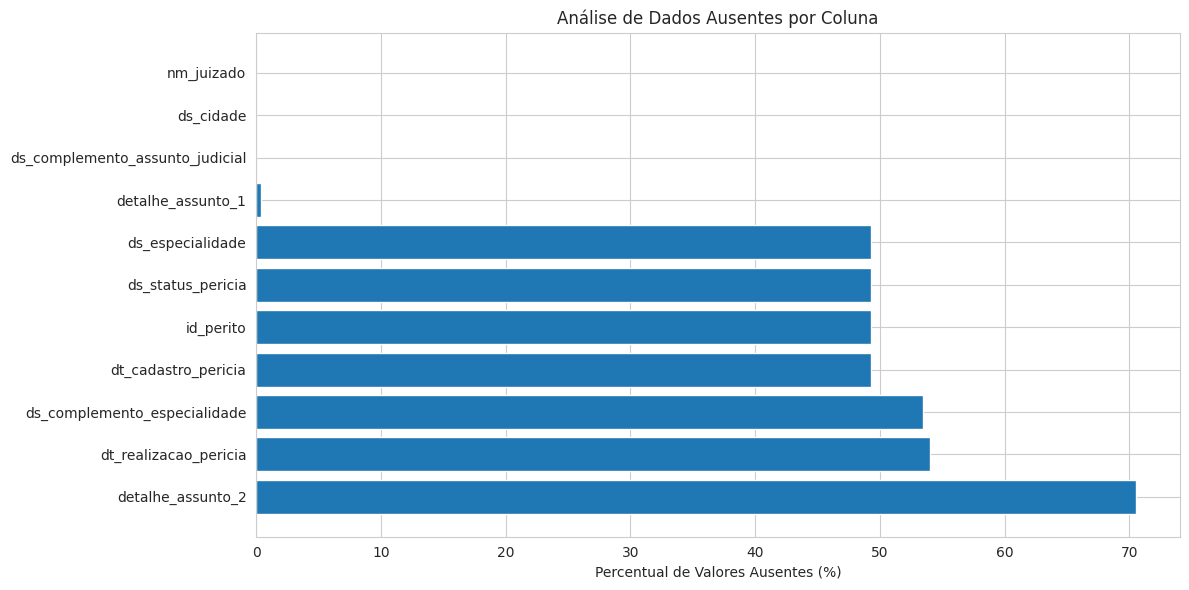

In [45]:
# Análise de valores ausentes
def analyze_missing_values(df):
    missing = pd.DataFrame({
        'Coluna': df.columns,
        'Total_Missing': df.isnull().sum(),
        'Percentual_Missing': (df.isnull().sum() / len(df) * 100).round(2),
        'Tipo_Dado': df.dtypes
    })
    missing = missing[missing['Total_Missing'] > 0].sort_values('Total_Missing', ascending=False)
    return missing

missing_analysis = analyze_missing_values(df)

if not missing_analysis.empty:
    print("\n⚠️ VALORES AUSENTES DETECTADOS")
    print("="*80)
    display(missing_analysis)

    # Visualizar valores ausentes
    plt.figure(figsize=(12, 6))
    plt.barh(missing_analysis['Coluna'], missing_analysis['Percentual_Missing'])
    plt.xlabel('Percentual de Valores Ausentes (%)')
    plt.title('Análise de Dados Ausentes por Coluna')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ Nenhum valor ausente detectado!")

In [46]:
# Análise de duplicatas
duplicates = df.duplicated().sum()
print(f"\nTotal de registros duplicados: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\nExemplo de registros duplicados:")
    display(df[df.duplicated(keep=False)].head())


Total de registros duplicados: 0 (0.00%)


## 6. Classificação Automática de Variáveis

In [13]:
# Identificar tipos de variáveis
def classify_variables(df, text_threshold=50):
    numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

    categorical_vars = []
    text_vars = []

    for col in df.select_dtypes(include=['object']).columns:
        unique_ratio = df[col].nunique() / len(df)
        avg_length = df[col].astype(str).str.len().mean()

        if avg_length > text_threshold or unique_ratio > 0.5:
            text_vars.append(col)
        else:
            categorical_vars.append(col)

    return {
        'numericas': numeric_vars,
        'categoricas': categorical_vars,
        'texto': text_vars
    }

var_types = classify_variables(df)

print("\n📊 CLASSIFICAÇÃO DE VARIÁVEIS")
print("="*80)
print(f"\n✓ Variáveis Numéricas ({len(var_types['numericas'])}):", var_types['numericas'])
print(f"\n✓ Variáveis Categóricas ({len(var_types['categoricas'])}):", var_types['categoricas'])
print(f"\n✓ Campos de Texto ({len(var_types['texto'])}):", var_types['texto'])


📊 CLASSIFICAÇÃO DE VARIÁVEIS

✓ Variáveis Numéricas (6): ['index', 'id_processo_judicial', 'id_perito', 'vara', 'triagem_peticao', 'tamanho_texto']

✓ Variáveis Categóricas (18): ['dt_primeira_distribuicao', 'in_tutela_antecipada', 'nm_juizado', 'ds_cidade', 'codigo_assunto', 'ds_assunto_judicial', 'ds_complemento_assunto_judicial', 'detalhe_assunto_1', 'detalhe_assunto_2', 'ds_especialidade', 'ds_complemento_especialidade', 'ds_status_pericia', 'dt_cadastro_pericia', 'dt_realizacao_pericia', 'ds_tipo_documento', 'ds_extensao', 'label_especialidade', 'requer_pericia']

✓ Campos de Texto (4): ['nr_processo_judicial', 'nm_arquivo', 'dt_inclusao', 'texto_limpo']


## 7. Análise de Variáveis Numéricas

In [14]:
# Estatísticas descritivas das variáveis numéricas
if var_types['numericas']:
    print("\n📈 ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
    print("="*80)
    display(df[var_types['numericas']].describe().T)


📈 ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS


,count,mean,std,min,25%,50%,75%,max
index,165499.0,103432.925848,59690.320784,1.0,51780.0,103413.0,155042.5,206873.0
id_processo_judicial,165499.0,343205.470498,92186.776313,12931.0,274302.5,348817.0,424940.5,487655.0
id_perito,83939.0,154820.148251,95972.000802,5.0,79438.0,140751.0,233972.0,353420.0
vara,165499.0,8401.125499,1.508930,8400.0,8400.0,8400.0,8402.0,8405.0
triagem_peticao,165499.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
tamanho_texto,165499.0,15682.545774,10777.651211,2003.0,8713.0,12513.0,19174.0,99971.0


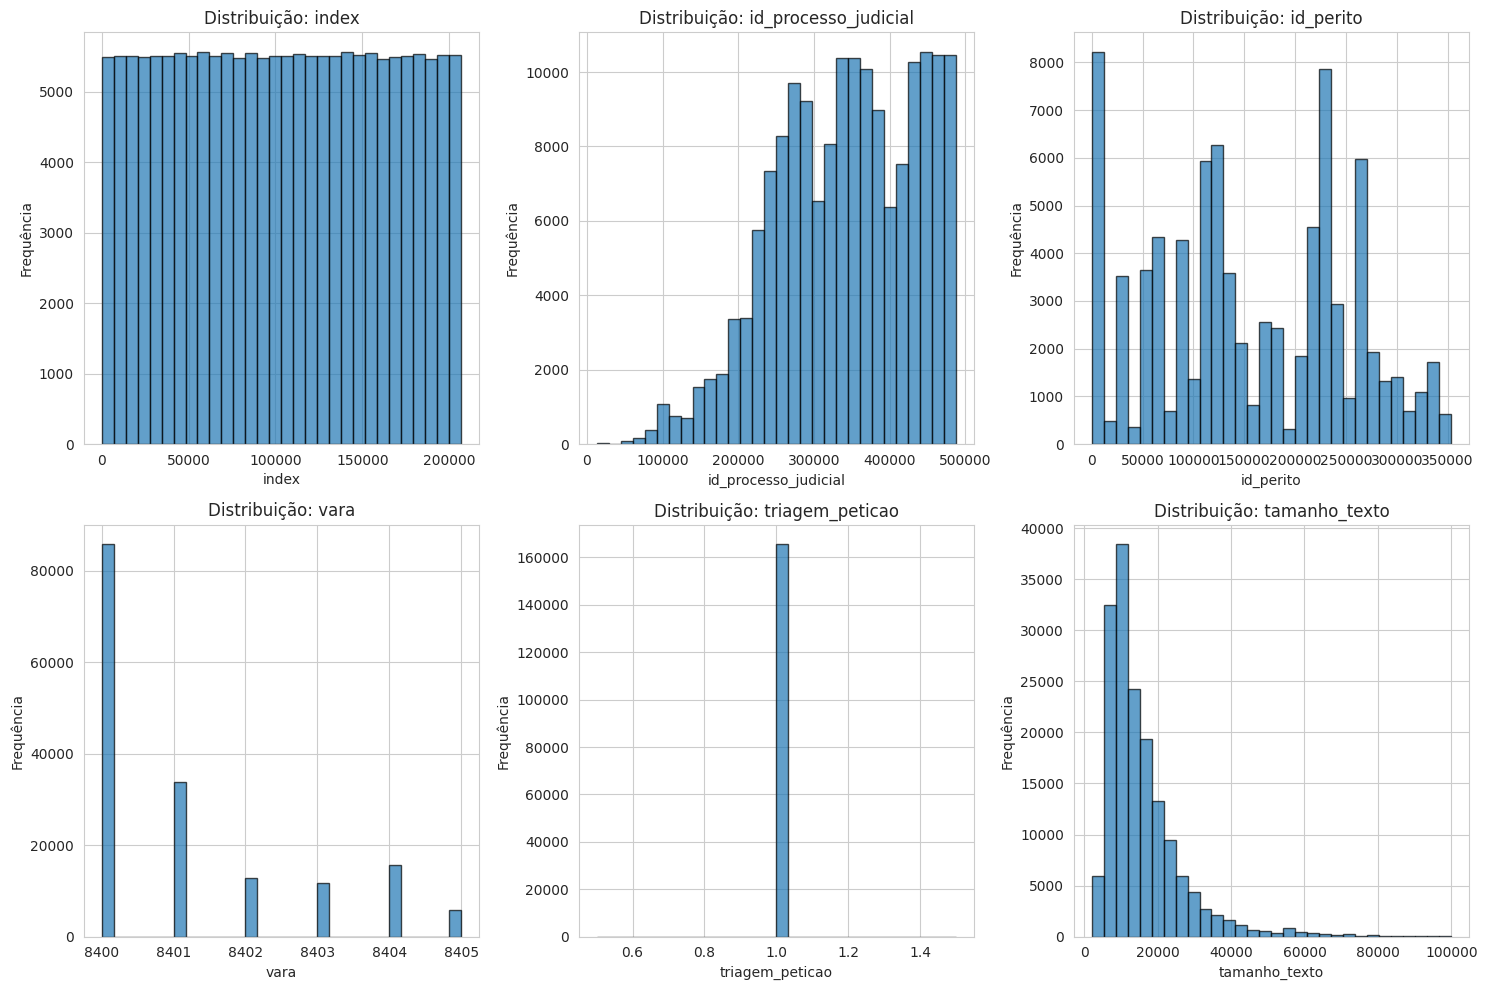

In [15]:
# Distribuições das variáveis numéricas
if var_types['numericas']:
    n_cols = min(3, len(var_types['numericas']))
    n_rows = (len(var_types['numericas']) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(var_types['numericas']) > 1 else [axes]

    for idx, col in enumerate(var_types['numericas']):
        df[col].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribuição: {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequência')

    # Remover subplots vazios
    for idx in range(len(var_types['numericas']), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

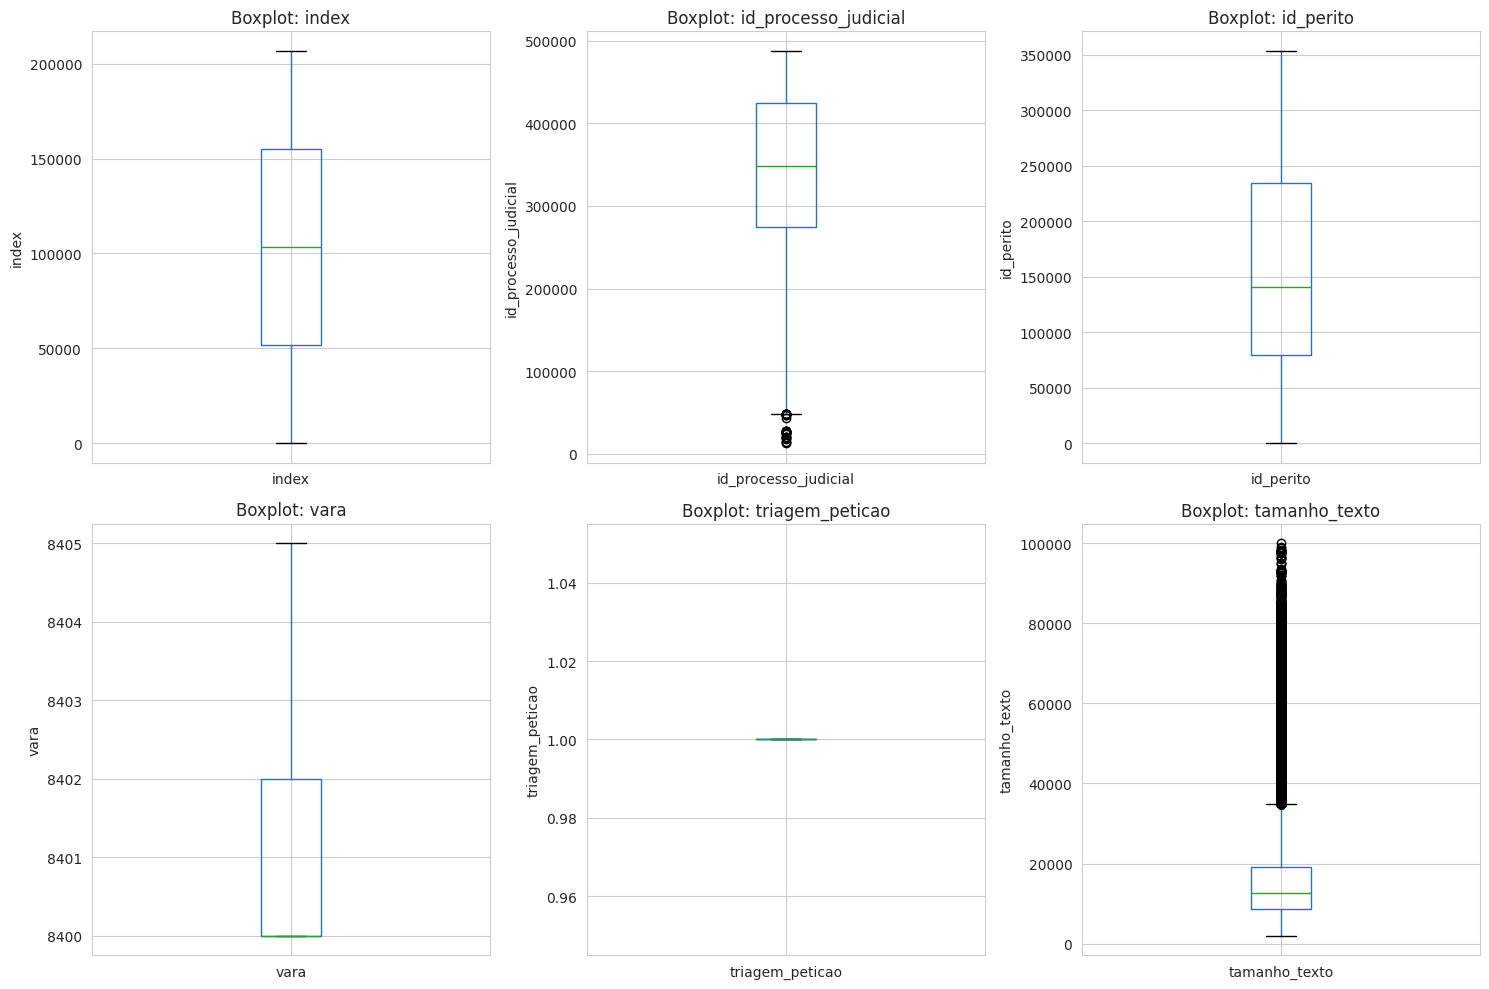

In [16]:
# Boxplots para detectar outliers
if var_types['numericas']:
    n_cols = min(3, len(var_types['numericas']))
    n_rows = (len(var_types['numericas']) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(var_types['numericas']) > 1 else [axes]

    for idx, col in enumerate(var_types['numericas']):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot: {col}')
        axes[idx].set_ylabel(col)

    # Remover subplots vazios
    for idx in range(len(var_types['numericas']), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

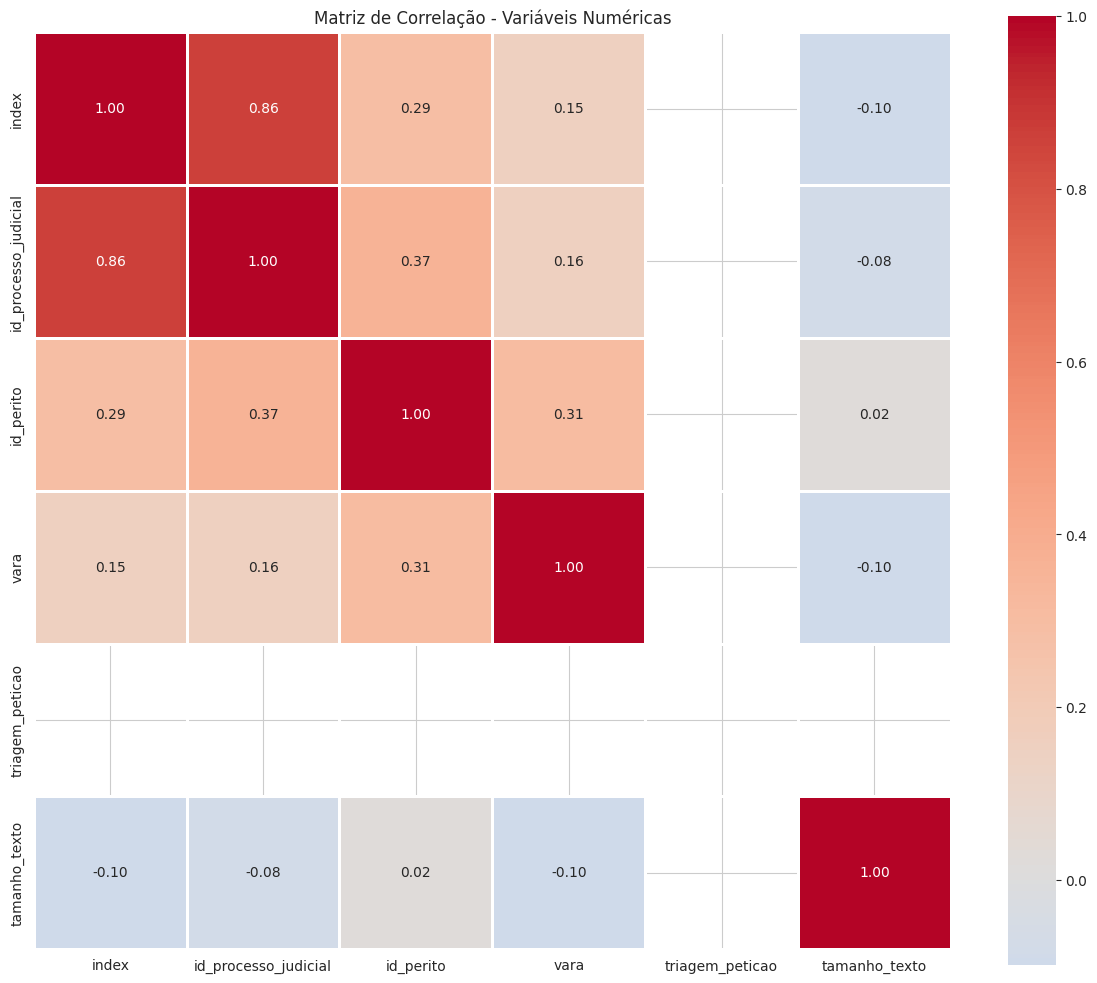


🔗 CORRELAÇÕES MAIS FORTES (|r| > 0.5):


,Var1,Var2,Correlação
0,index,id_processo_judicial,0.858727


In [17]:
# Matriz de correlação
if len(var_types['numericas']) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[var_types['numericas']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f')
    plt.title('Matriz de Correlação - Variáveis Numéricas')
    plt.tight_layout()
    plt.show()

    # Correlações mais fortes
    print("\n🔗 CORRELAÇÕES MAIS FORTES (|r| > 0.5):")
    print("="*80)
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                corr_pairs.append({
                    'Var1': correlation_matrix.columns[i],
                    'Var2': correlation_matrix.columns[j],
                    'Correlação': correlation_matrix.iloc[i, j]
                })

    if corr_pairs:
        corr_df = pd.DataFrame(corr_pairs).sort_values('Correlação', ascending=False, key=abs)
        display(corr_df)
    else:
        print("Nenhuma correlação forte detectada.")

## 8. Análise de Variáveis Categóricas

In [18]:
# Análise de cardinalidade das variáveis categóricas
if var_types['categoricas']:
    print("\n📋 ANÁLISE DE VARIÁVEIS CATEGÓRICAS")
    print("="*80)

    categorical_summary = []
    for col in var_types['categoricas']:
        categorical_summary.append({
            'Variável': col,
            'Valores_Únicos': df[col].nunique(),
            'Valor_Mais_Frequente': df[col].mode()[0] if not df[col].mode().empty else None,
            'Frequência_Máxima': df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0,
            'Percentual_Máximo': f"{df[col].value_counts(normalize=True).iloc[0]*100:.2f}%" if len(df[col]) > 0 else "0%"
        })

    cat_summary_df = pd.DataFrame(categorical_summary)
    display(cat_summary_df)


📋 ANÁLISE DE VARIÁVEIS CATEGÓRICAS


,Variável,Valores_Únicos,Valor_Mais_Frequente,Frequência_Máxima,Percentual_Máximo
0,dt_primeira_distribuicao,2474,2017-01-09 00:00:00,827,0.50%
1,in_tutela_antecipada,2,N,133690,80.78%
2,nm_juizado,9,7a. Vara Federal,43139,26.07%
3,ds_cidade,6,Natal,84619,51.13%
4,codigo_assunto,8,195,119492,72.20%
5,ds_assunto_judicial,8,Direito Previdenciário,119492,72.20%
6,ds_complemento_assunto_judicial,59,Benefícios em Espécie,112003,67.69%
7,detalhe_assunto_1,268,Auxílio-Doença Previdenciário,48226,29.25%
8,detalhe_assunto_2,339,Rural (Art. 48/51),8470,17.36%
9,ds_especialidade,2,Médico,77090,91.84%



📊 Distribuição: dt_primeira_distribuicao
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,2017-01-09 00:00:00,827,0.50
1,2019-01-07 00:00:00,601,0.36
2,2019-04-22 00:00:00,431,0.26
3,2013-01-07 00:00:00,428,0.26
4,2018-01-08 00:00:00,359,0.22
5,2017-04-17 00:00:00,353,0.21
6,2018-12-03 00:00:00,323,0.20
7,2016-11-03 00:00:00,316,0.19
8,2016-05-23 00:00:00,314,0.19
9,2015-01-07 00:00:00,314,0.19


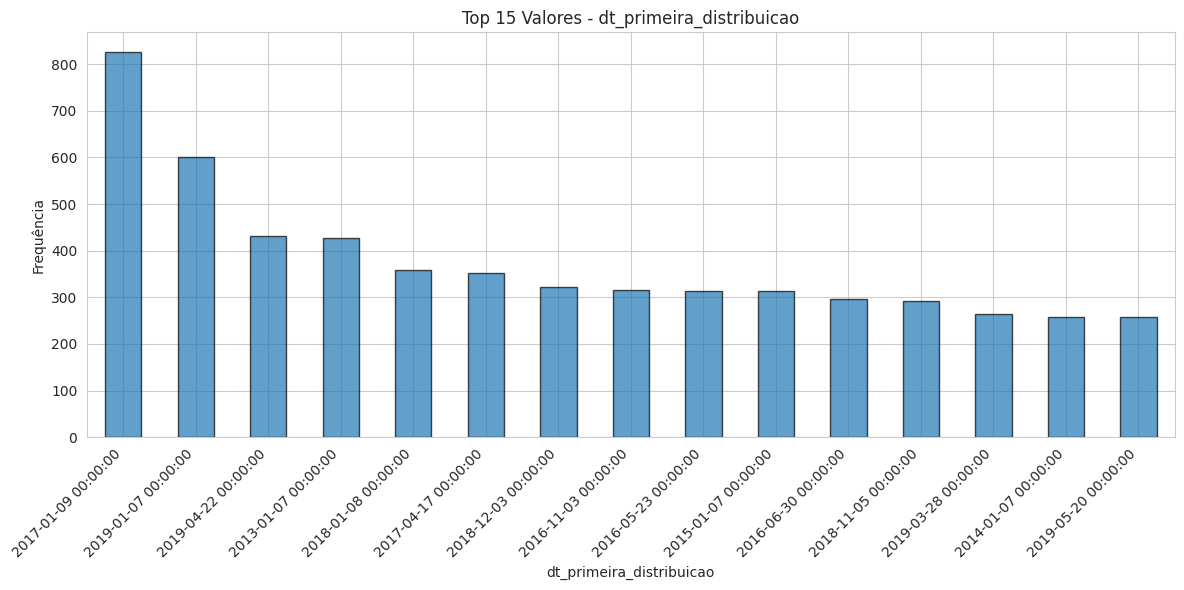


📊 Distribuição: in_tutela_antecipada
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,N,133690,80.78
1,S,31809,19.22


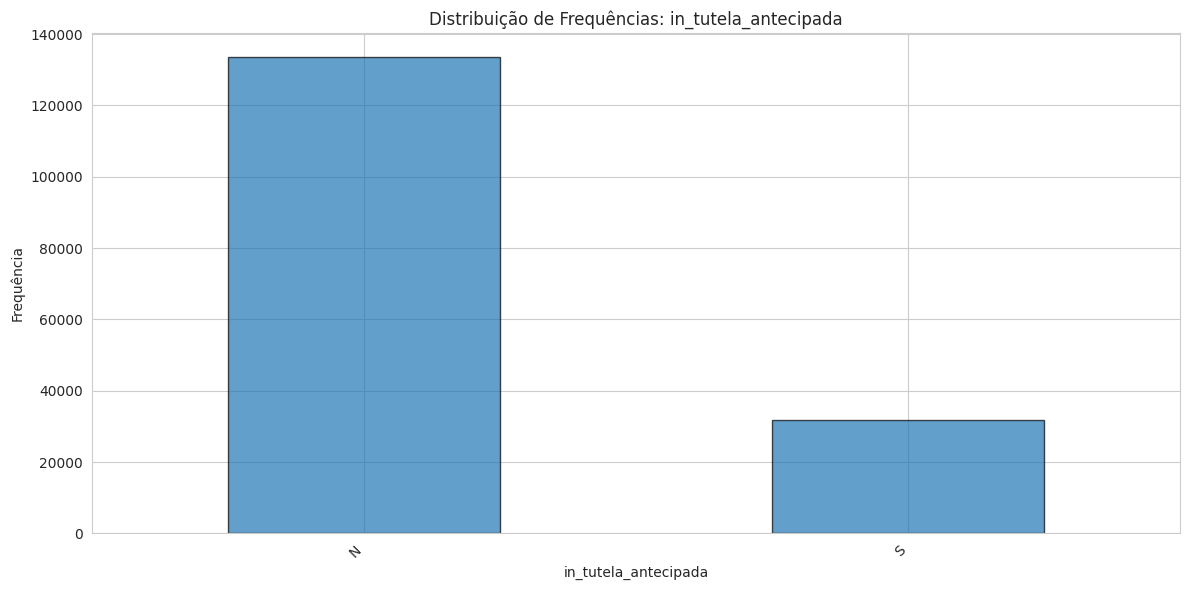


📊 Distribuição: nm_juizado
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,7a. Vara Federal,43139,26.07
1,3a. Vara Federal,41480,25.06
2,13a. Vara Federal,33377,20.17
3,12a. Vara Federal - Pau dos Ferros,15764,9.53
4,9a. Vara Federal,12954,7.83
5,11a. Vara Federal - Açú,11968,7.23
6,15a. Vara Federal,6666,4.03
7,10a. Vara Federal,78,0.05
8,8a. Vara Federal,72,0.04


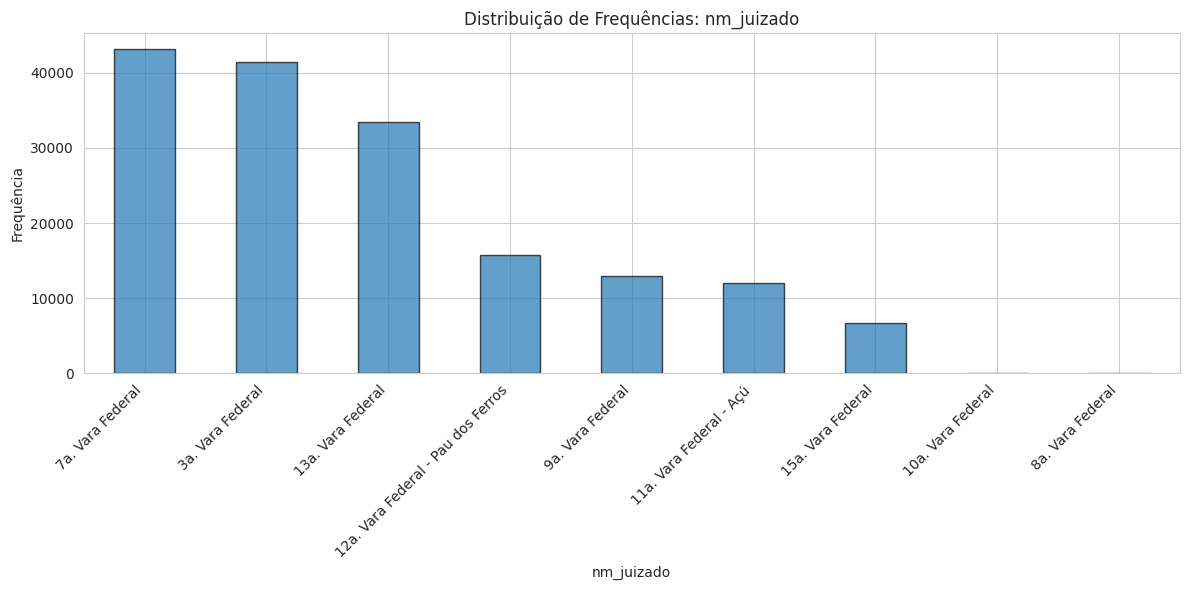


📊 Distribuição: ds_cidade
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Natal,84619,51.13
1,Mossoró,33527,20.26
2,Pau dos Ferros,15764,9.53
3,Caicó,12954,7.83
4,Açu,11968,7.23
5,Ceará-Mirim,6666,4.03


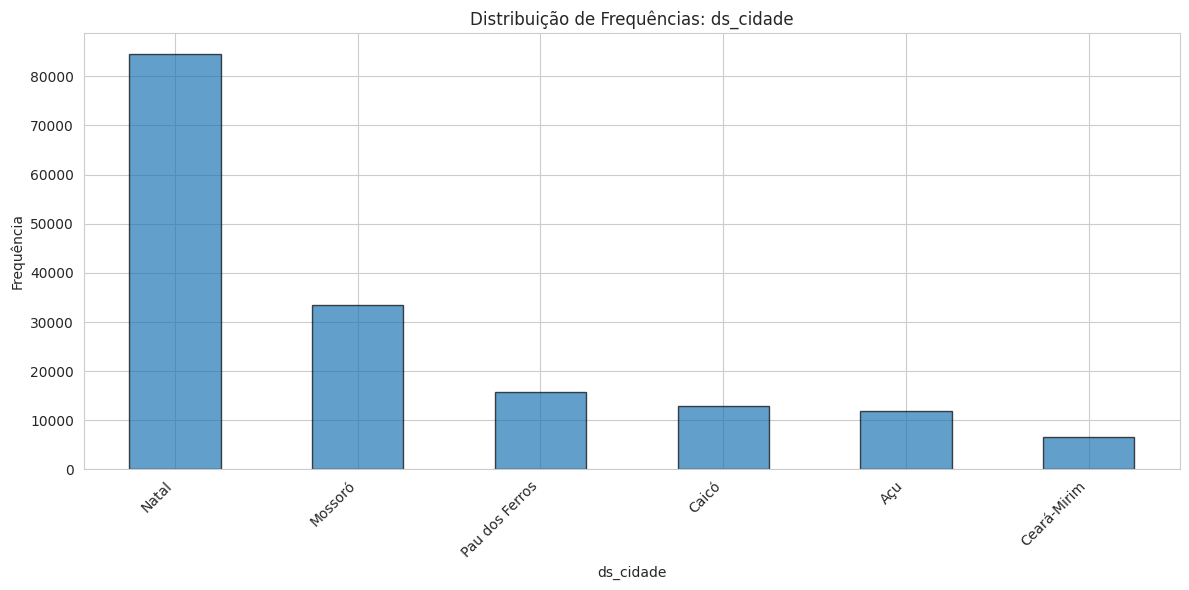


📊 Distribuição: codigo_assunto
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,195,119492,72.20
1,9985,24009,14.51
2,1156,9701,5.86
3,899,5755,3.48
4,14,5137,3.10
5,8826,984,0.59
6,864,413,0.25
7,6191,8,0.00


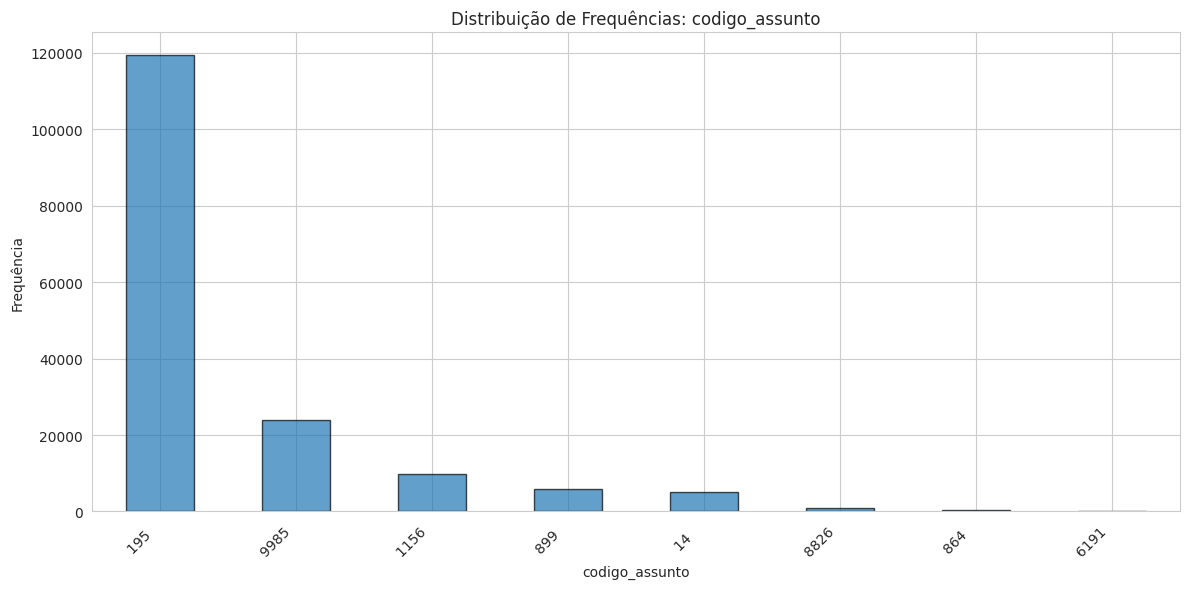


📊 Distribuição: ds_assunto_judicial
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Direito Previdenciário,119492,72.20
1,Direito Administrativo e outras matérias do Di...,24009,14.51
2,Direito do Consumidor,9701,5.86
3,Direito Civil,5755,3.48
4,Direito Tributário,5137,3.10
5,Direito Processual Civil e do Trabalho,984,0.59
6,Direito do Trabalho,413,0.25
7,Direito Internacional,8,0.00


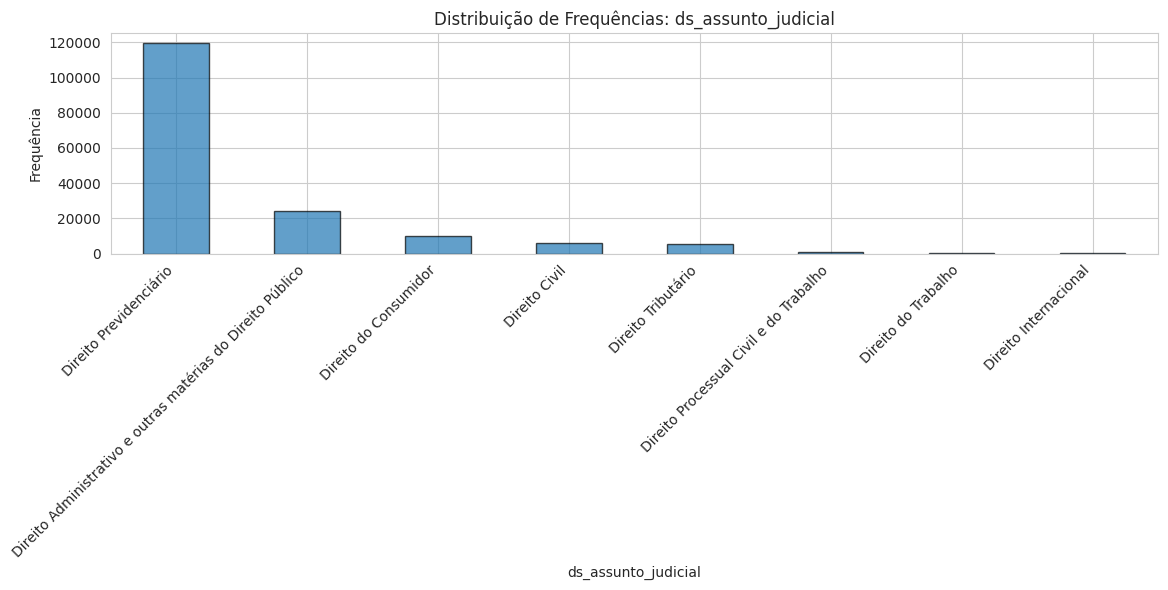


📊 Distribuição: ds_complemento_assunto_judicial
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Benefícios em Espécie,112003,67.68
1,Servidor Público Civil,16444,9.94
2,Responsabilidade do Fornecedor,6307,3.81
3,Pedidos Genéricos Relativos aos Benefícios em ...,4477,2.71
4,Serviços,3641,2.20
5,Contratos de Consumo,3394,2.05
6,Responsabilidade Civil,3018,1.82
7,Obrigações,2689,1.62
8,Contribuições,2571,1.55
9,Organização Político-administrativa / Administ...,2051,1.24


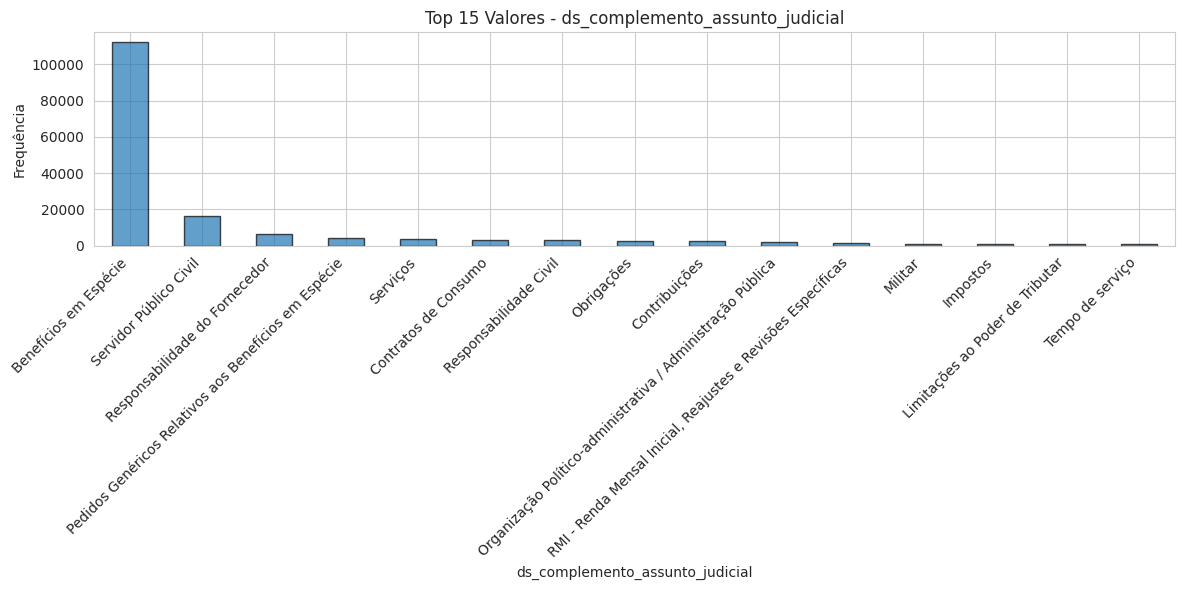


📊 Distribuição: detalhe_assunto_1
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Auxílio-Doença Previdenciário,48226,29.14
1,"Benefício Assistencial (Art. 203,V CF/88)",18162,10.97
2,Aposentadoria por Invalidez,17171,10.38
3,Sistema Remuneratório e Benefícios,15377,9.29
4,Aposentadoria por Idade (Art. 48/51),9913,5.99
5,Pensão por Morte (Art. 74/9),6378,3.85
6,Indenização por Dano Moral,5886,3.56
7,Salário-Maternidade (Art. 71/73),4966,3.00
8,Indenização por Dano Material,2949,1.78
9,Saúde,2769,1.67


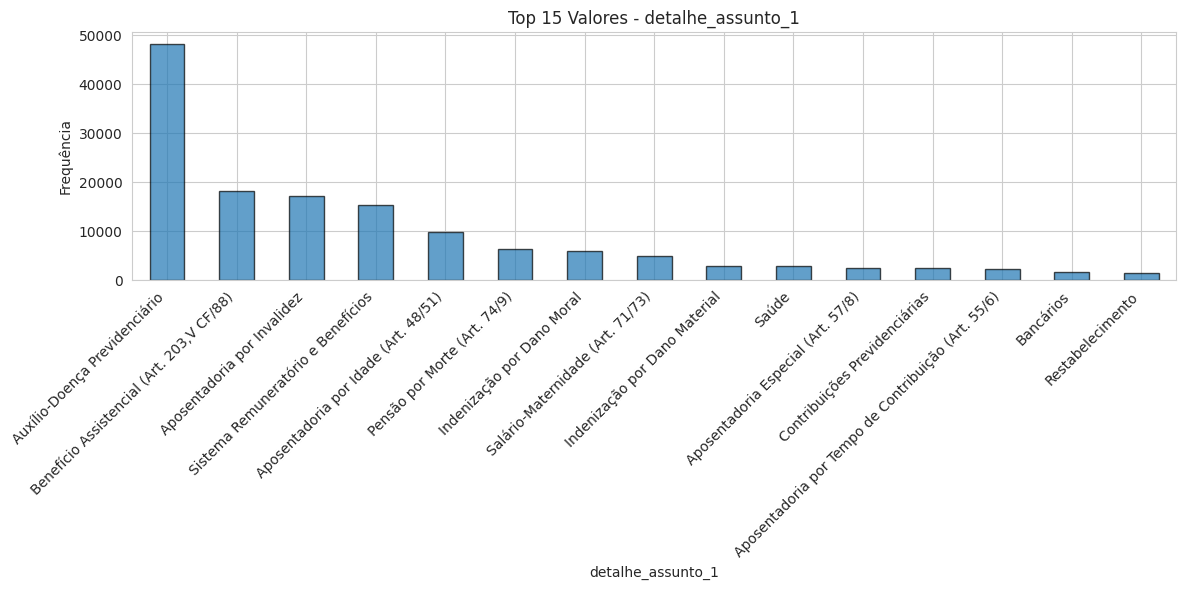


📊 Distribuição: detalhe_assunto_2
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Rural (Art. 48/51),8470,5.12
1,Revisão Geral Anual (Mora do Executivo - incis...,3554,2.15
2,Inclusão Indevida em Cadastro de Inadimplentes,2841,1.72
3,Direito de Imagem,2499,1.51
4,Tratamento Médico-Hospitalar e/ou Fornecimento...,2402,1.45
5,Gratificações de Atividade,2121,1.28
6,Auxílio-Alimentação,2036,1.23
7,Gratificação de Incentivo,1794,1.08
8,Expurgos Inflacionários / Planos Econômicos,1629,0.98
9,Urbana (Art. 48/51),1437,0.87


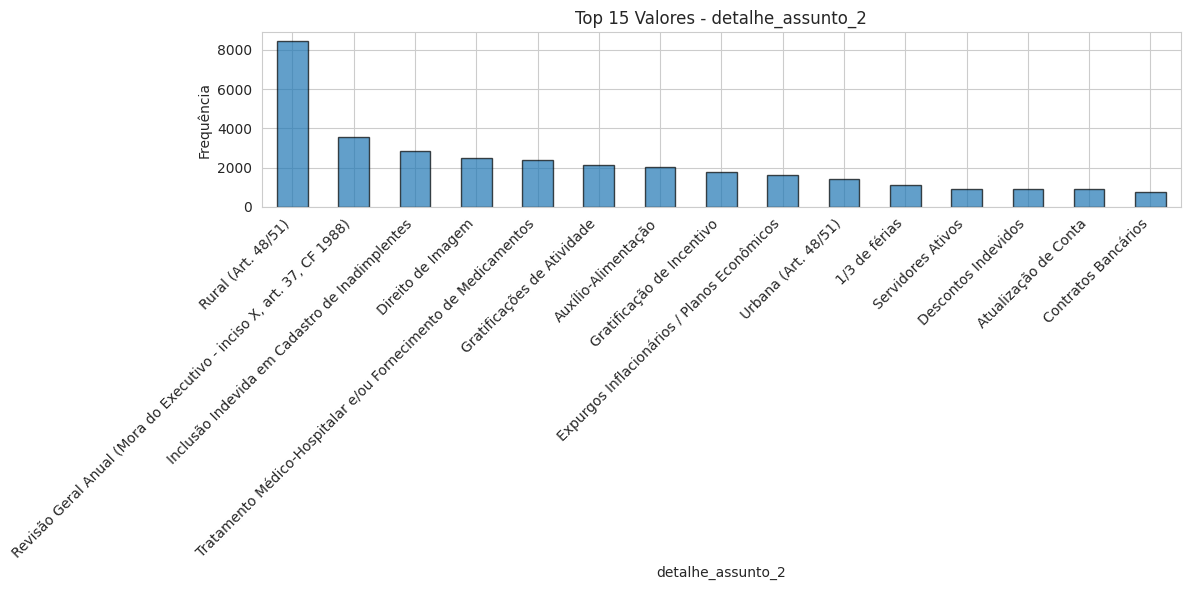


📊 Distribuição: ds_especialidade
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Médico,77090,46.58
1,Assistente Social,6849,4.14


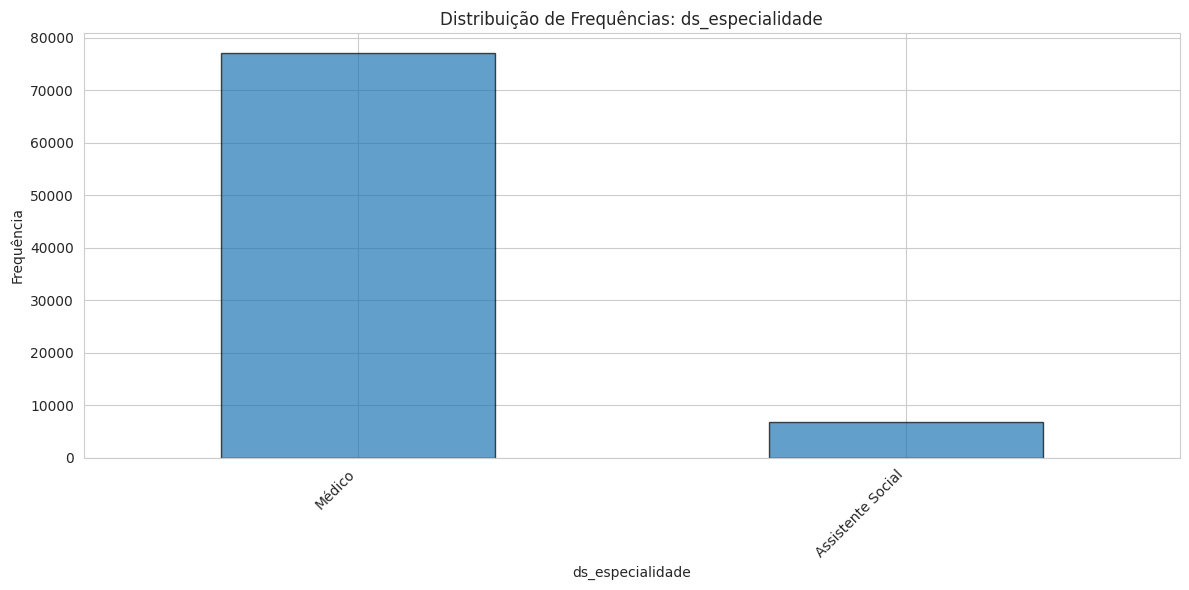


📊 Distribuição: ds_complemento_especialidade
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Ortopedista,24906,15.05
1,Psiquiatra,18393,11.11
2,Médico do Trabalho,13372,8.08
3,Clínico Geral,12142,7.34
4,Reumatologista,2488,1.50
5,Neurologista,2449,1.48
6,Oftalmologista,1682,1.02
7,Cardiologista,1658,1.00


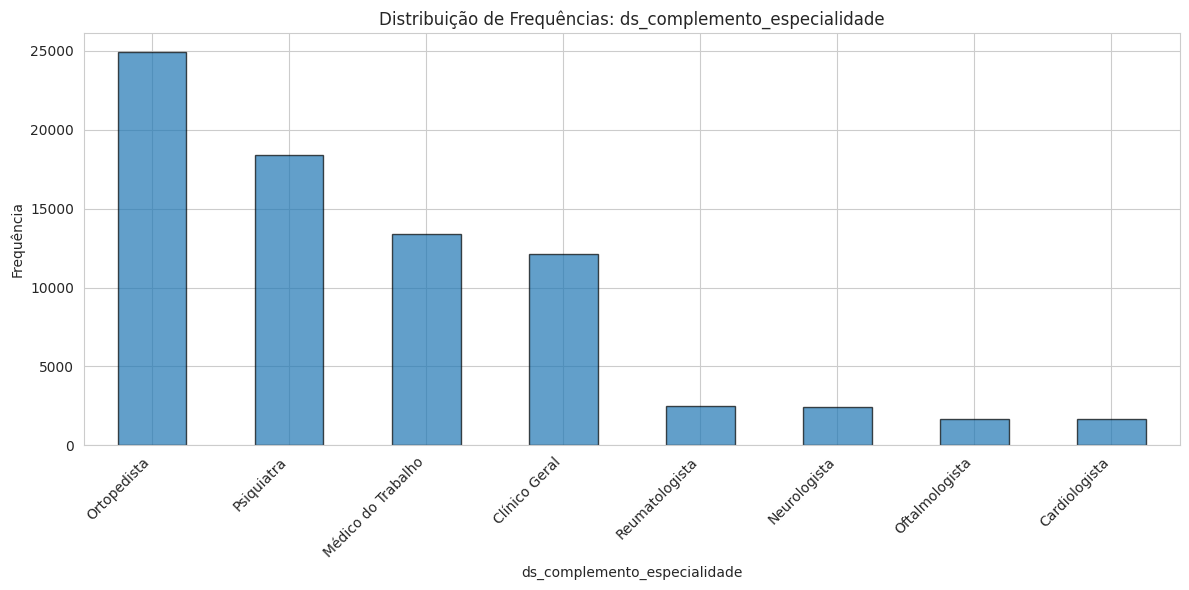


📊 Distribuição: ds_status_pericia
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Realizada,70238,42.44
1,Ausência da Parte,5808,3.51
2,Cancelada,4906,2.96
3,Pendente,2789,1.69
4,Remarcada,198,0.12


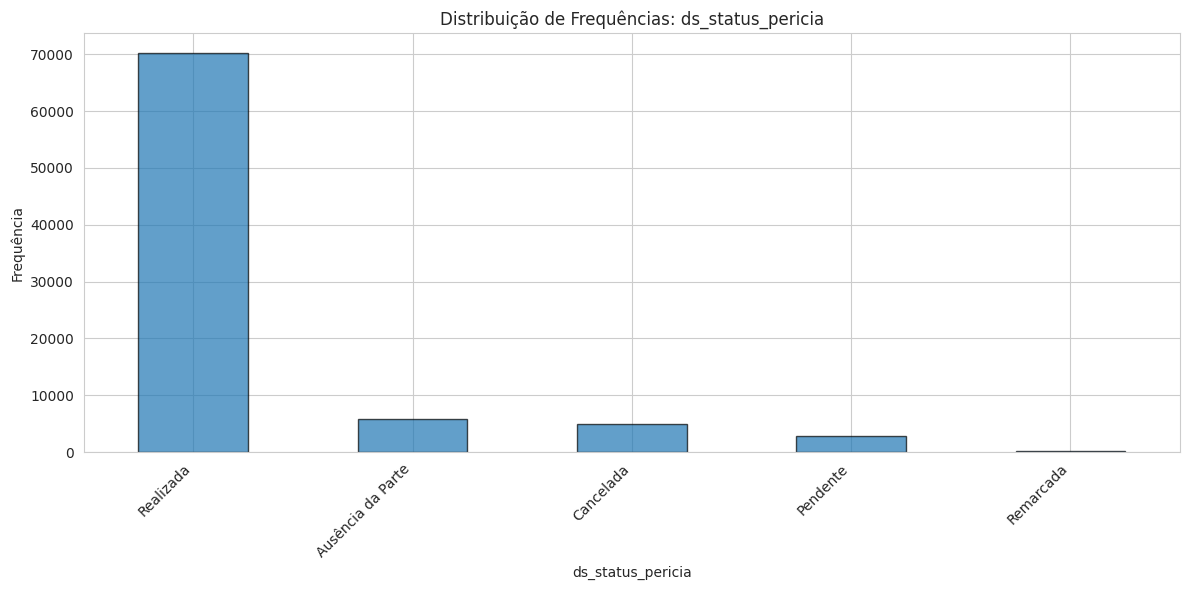


📊 Distribuição: dt_cadastro_pericia
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,2018-07-05 18:49:51.049048,83,0.05
1,2018-08-07 20:27:40.764543,60,0.04
2,2018-08-09 16:25:02.341828,59,0.04
3,2018-06-15 15:59:00.271976,56,0.03
4,2015-05-28 10:46:18.307522,54,0.03
5,2018-06-07 17:34:27.442196,53,0.03
6,2019-04-11 08:54:55.275500,51,0.03
7,2018-07-13 15:29:21.178892,49,0.03
8,2015-02-03 15:04:32.295498,47,0.03
9,2019-03-12 13:57:10.416531,46,0.03


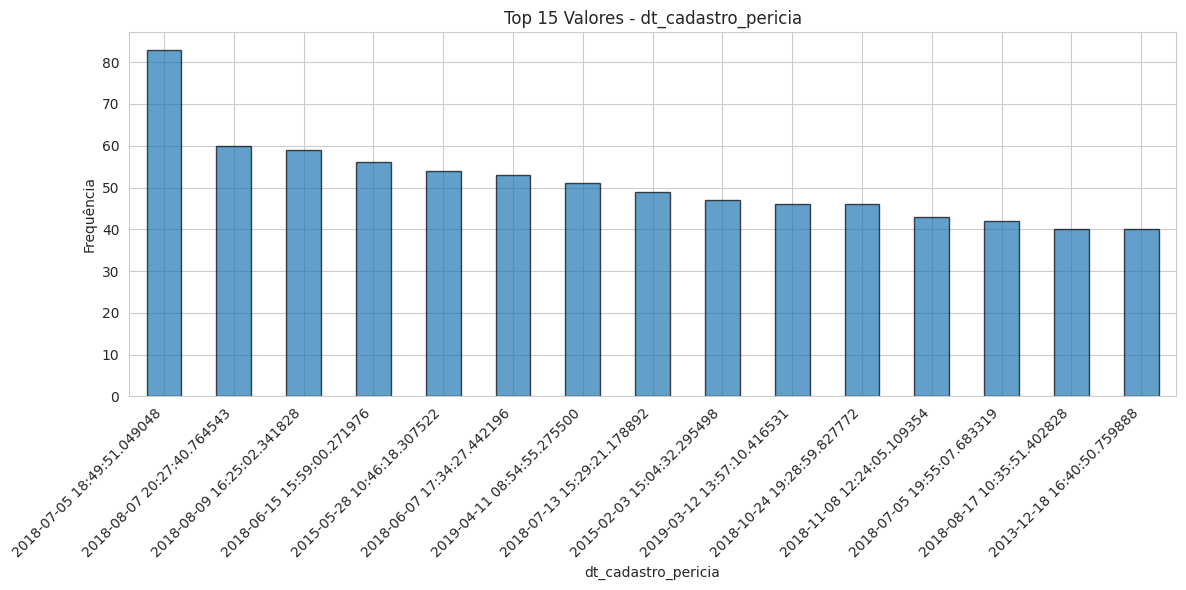


📊 Distribuição: dt_realizacao_pericia
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,2019-03-15 17:12:15.212421,1,0.0
1,2014-07-03 11:31:01.517090,1,0.0
2,2016-10-07 11:33:19.011700,1,0.0
3,2016-10-18 12:17:12.229873,1,0.0
4,2018-01-11 11:41:06.125536,1,0.0
5,2016-11-07 12:39:01.684785,1,0.0
6,2017-09-13 18:03:56.734609,1,0.0
7,2019-03-18 09:35:45.912068,1,0.0
8,2018-03-27 12:01:43.578981,1,0.0
9,2018-05-30 16:17:17.392042,1,0.0


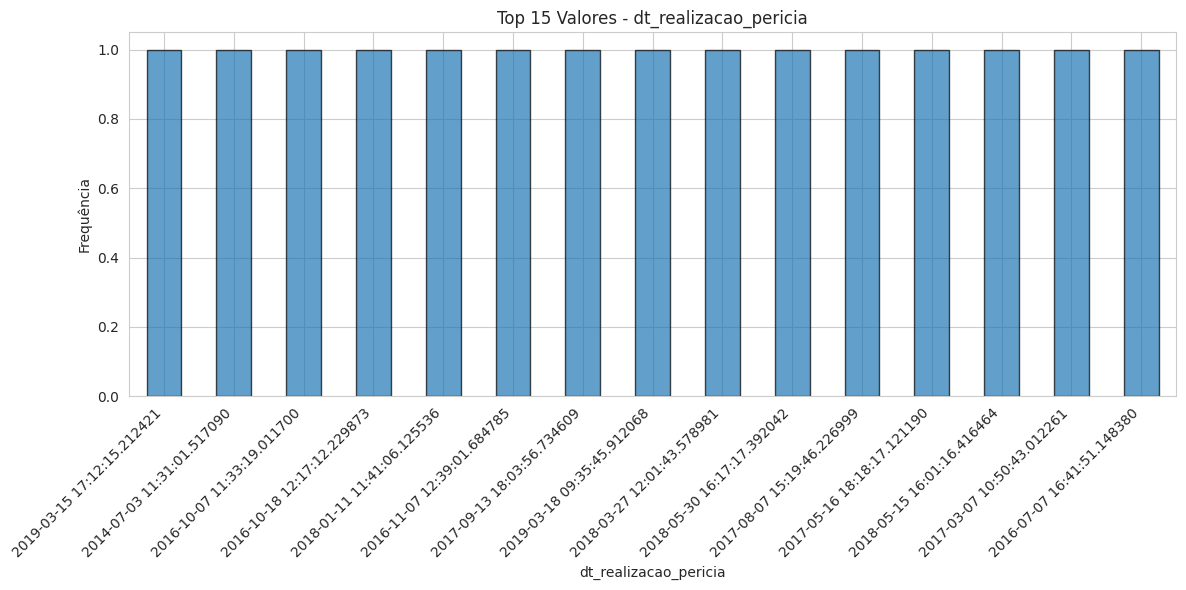


📊 Distribuição: ds_tipo_documento
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,Petição Inicial,165499,100.0


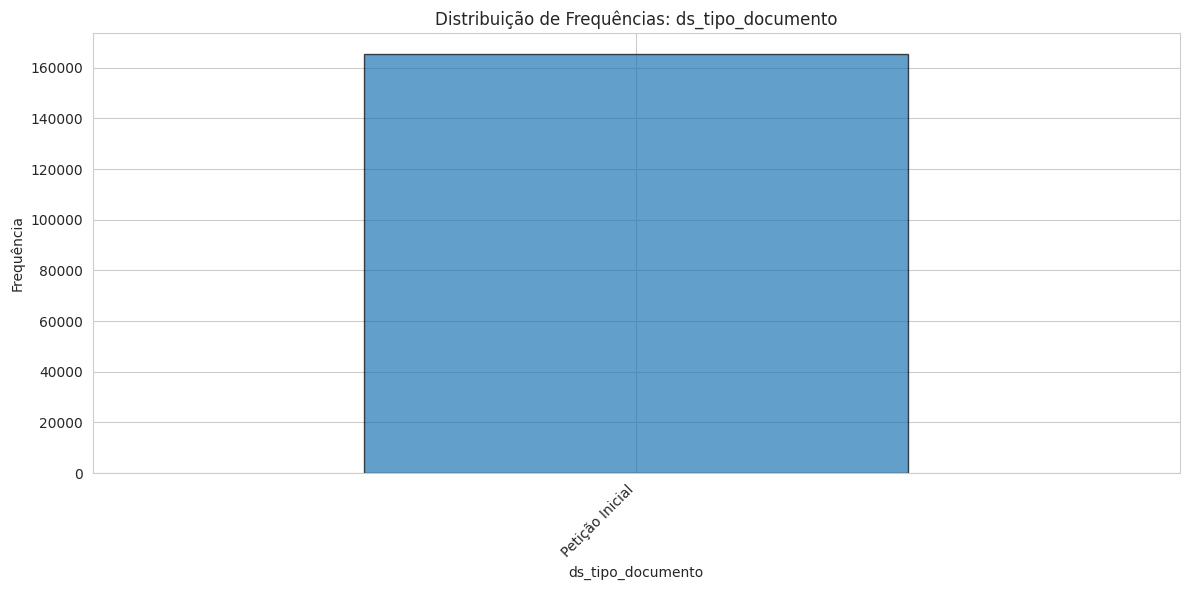


📊 Distribuição: ds_extensao
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,pdf,113252,68.43
1,doc,44457,26.86
2,docx,7707,4.66
3,PDF,53,0.03
4,DOC,30,0.02


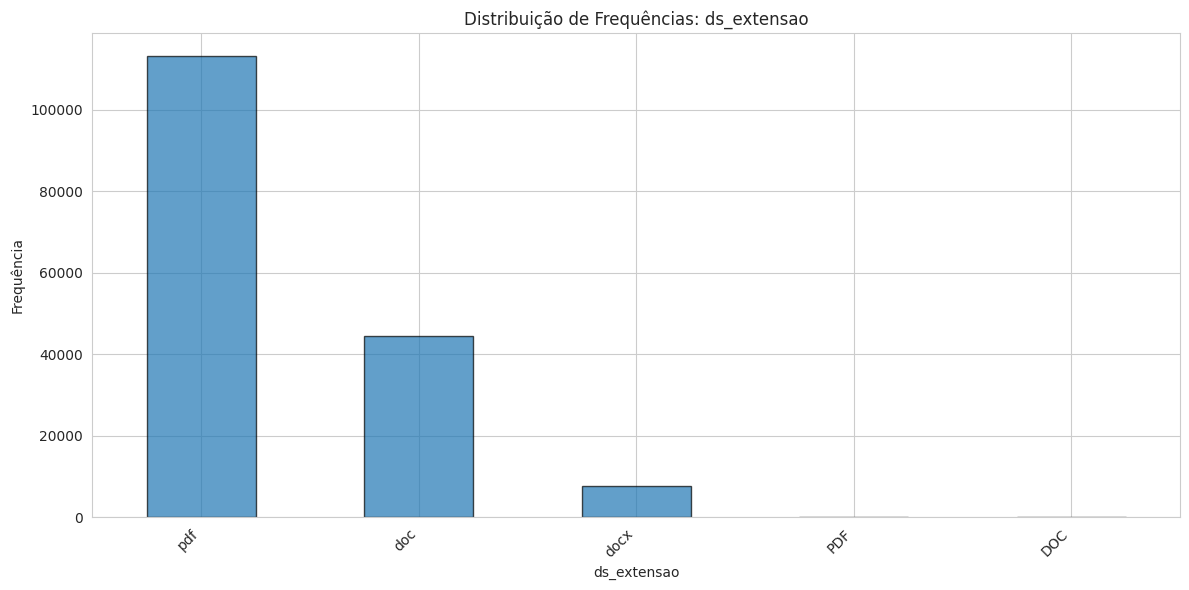


📊 Distribuição: label_especialidade
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,SEM PERICIA,81560,49.28
1,Ortopedista,24257,14.66
2,Psiquiatra,16674,10.07
3,Médico do Trabalho,12807,7.74
4,Clínico Geral,11446,6.92
5,Assistente Social+Médico,5836,3.53
6,Assistente Social,5091,3.08
7,Reumatologista,2477,1.50
8,Neurologista,2171,1.31
9,Oftalmologista,1595,0.96


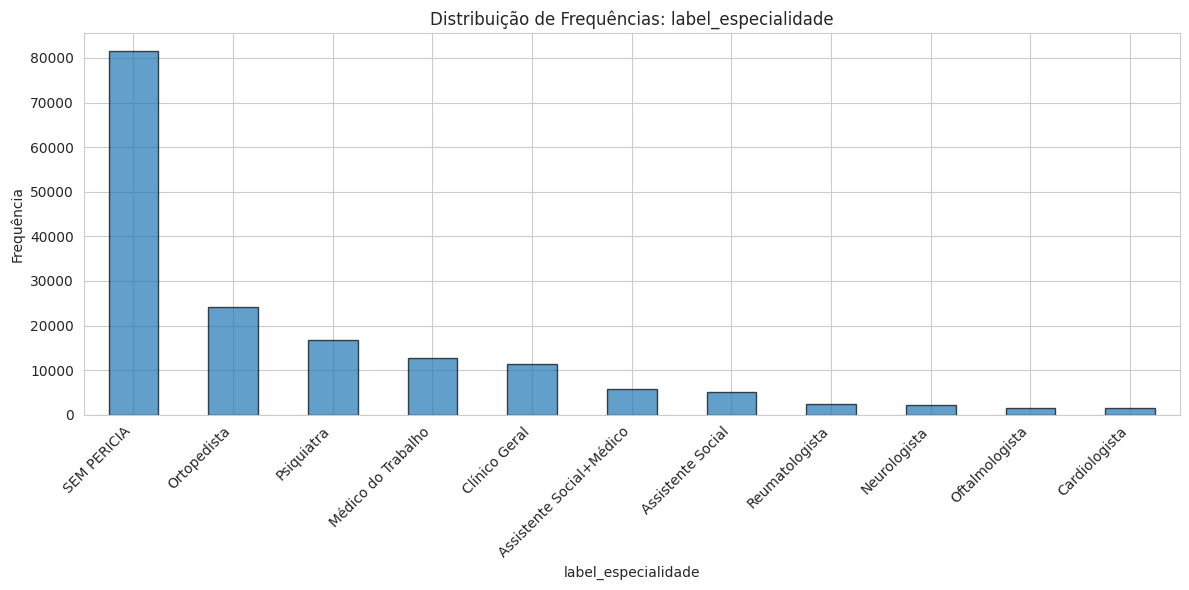


📊 Distribuição: requer_pericia
--------------------------------------------------------------------------------

Top 10 valores mais frequentes:


,Valor,Frequência,Percentual
0,S,83939,50.72
1,N,81560,49.28


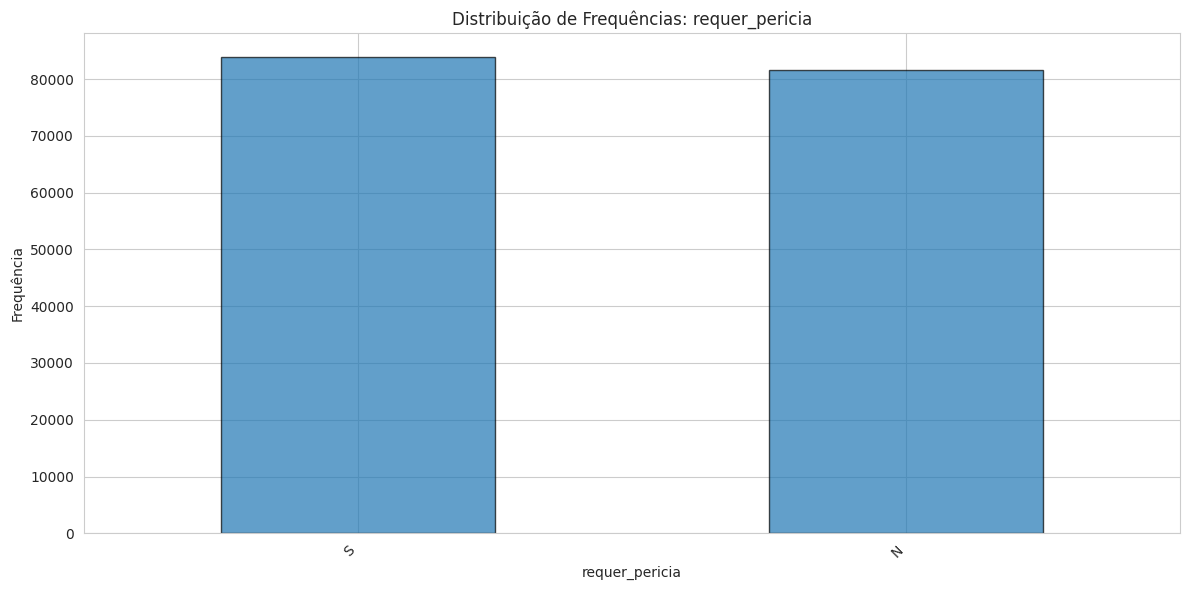

In [19]:
# Distribuição de frequências das variáveis categóricas
if var_types['categoricas']:
    for col in var_types['categoricas']:
        print(f"\n📊 Distribuição: {col}")
        print("-"*80)

        value_counts = df[col].value_counts()

        # Mostrar top 10 valores
        print(f"\nTop 10 valores mais frequentes:")
        display(pd.DataFrame({
            'Valor': value_counts.head(10).index,
            'Frequência': value_counts.head(10).values,
            'Percentual': (value_counts.head(10).values / len(df) * 100).round(2)
        }))

        # Gráfico de barras (limitado a top 15 para legibilidade)
        if len(value_counts) <= 15:
            plt.figure(figsize=(12, 6))
            value_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
            plt.title(f'Distribuição de Frequências: {col}')
            plt.xlabel(col)
            plt.ylabel('Frequência')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=(12, 6))
            value_counts.head(15).plot(kind='bar', edgecolor='black', alpha=0.7)
            plt.title(f'Top 15 Valores - {col}')
            plt.xlabel(col)
            plt.ylabel('Frequência')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

## 9. Análise de Campos de Texto

In [20]:
# Análise de campos de texto
if var_types['texto']:
    print("\n📝 ANÁLISE DE CAMPOS DE TEXTO")
    print("="*80)

    text_summary = []
    for col in var_types['texto']:
        text_lengths = df[col].astype(str).str.len()
        text_summary.append({
            'Campo': col,
            'Valores_Únicos': df[col].nunique(),
            'Comprimento_Médio': text_lengths.mean().round(2),
            'Comprimento_Min': text_lengths.min(),
            'Comprimento_Max': text_lengths.max(),
            'Comprimento_Mediana': text_lengths.median()
        })

    text_summary_df = pd.DataFrame(text_summary)
    display(text_summary_df)


📝 ANÁLISE DE CAMPOS DE TEXTO


,Campo,Valores_Únicos,Comprimento_Médio,Comprimento_Min,Comprimento_Max,Comprimento_Mediana
0,nr_processo_judicial,165499,25.00,25,25,25.0
1,nm_arquivo,106300,48.03,12,211,43.0
2,dt_inclusao,165499,26.00,19,26,26.0
3,texto_limpo,163046,13752.64,487,93609,10949.0



📊 Distribuição de Comprimento: nr_processo_judicial
--------------------------------------------------------------------------------


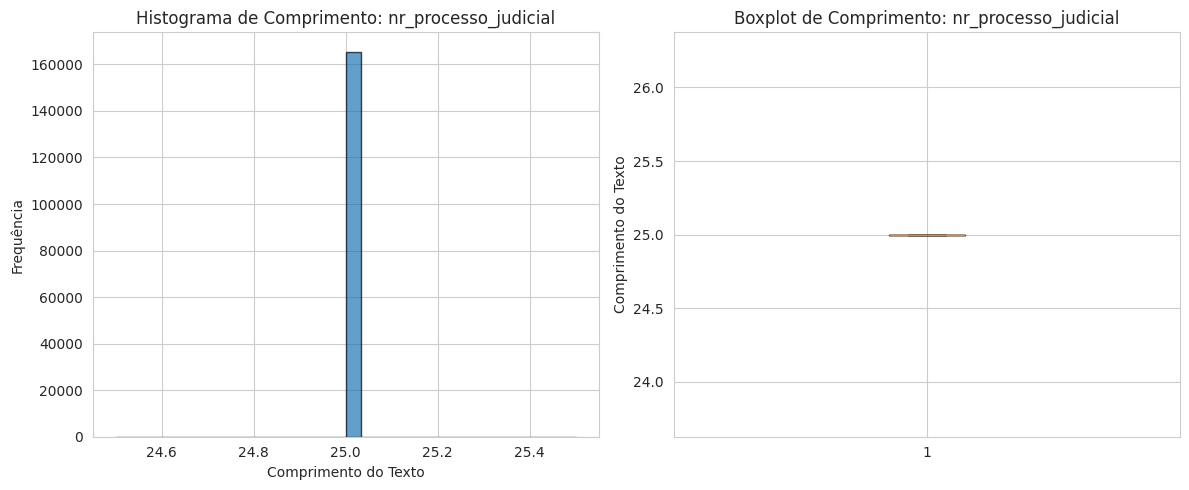


Exemplos de textos (primeiros 5 valores únicos):
1. 0501383-21.2019.4.05.8404
2. 0501266-12.2014.4.05.8402
3. 0500434-21.2010.4.05.8401
4. 0501512-74.2015.4.05.8401
5. 0501892-57.2016.4.05.8403

📊 Distribuição de Comprimento: nm_arquivo
--------------------------------------------------------------------------------


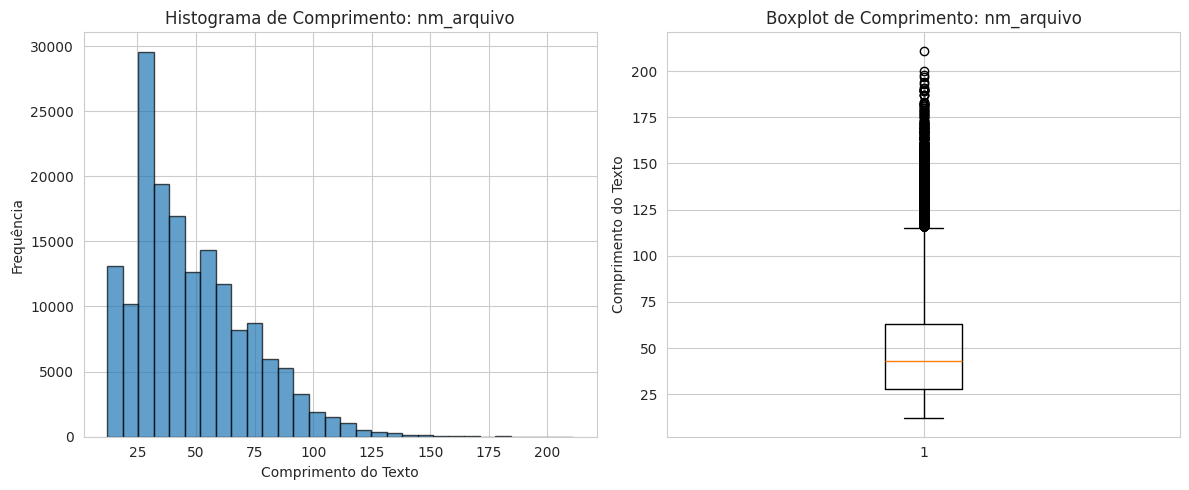


Exemplos de textos (primeiros 5 valores únicos):
1. petini_PETIÇÃO INICIAL.pdf
2. petini_auxílio doenca - 2014 - GERALDO SEVERIANO.pdf
3. petini_AÇÃO GDPGTAS E GDPGPE.doc
4. petini_Auxílio Doença  - José Albeci de Oliveira.pdf
5. petini_MARIA BARBOSA DOS SANTOS CPF 089.417.534-30 - BN 31 Rural.doc

📊 Distribuição de Comprimento: dt_inclusao
--------------------------------------------------------------------------------


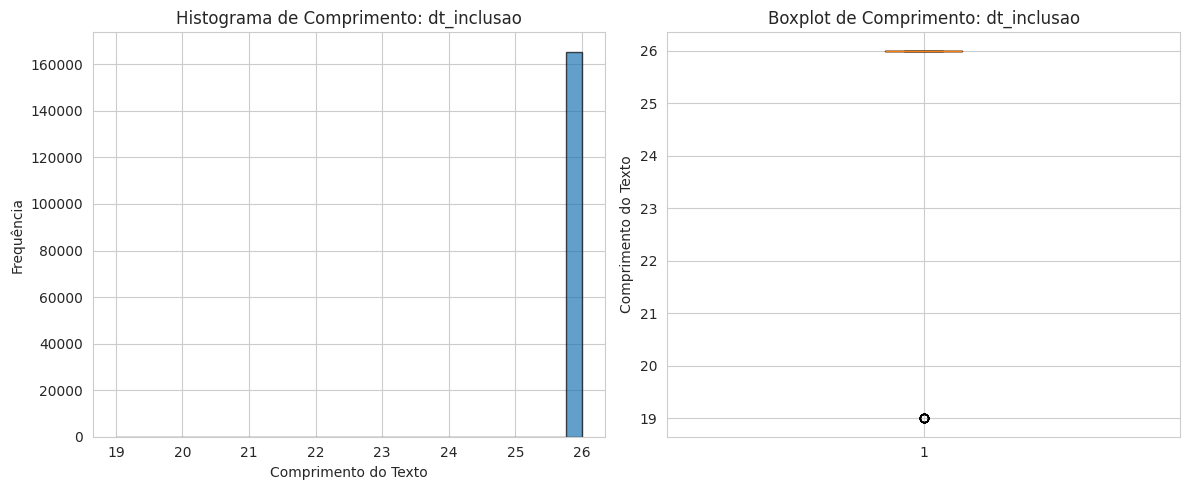


Exemplos de textos (primeiros 5 valores únicos):
1. 2019-04-24 12:33:02.747616
2. 2014-05-25 10:35:41.873462
3. 2010-01-22 11:21:54.838634
4. 2015-03-21 17:32:41.491795
5. 2016-09-06 11:28:42.119963

📊 Distribuição de Comprimento: texto_limpo
--------------------------------------------------------------------------------


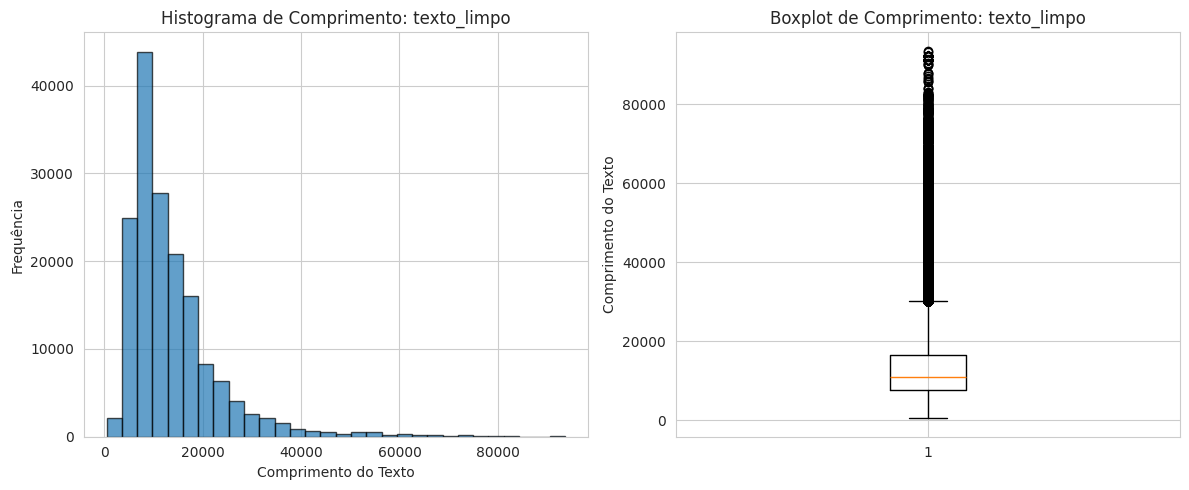


Exemplos de textos (primeiros 5 valores únicos):
1. 1 AO JUÍZO DO JUIZADO ESPECIAL FEDERAL DA 12ª VARA FEDERAL DE PAU DOS FERROS SUBSEÇÃO JUDICIÁRIA DO ...
2. EXCELENTÍSSIMO SENHOR DOUTOR JUIZ FEDERAL DO JUIZADO ESPECIAL DA 9ª VARA FEDERAL SUBSEÇÃO JUDICIÁRIA...
3. EXMO SR DR JUIZ FEDERAL DE UMA DAS VARAS DA SEÇÃO JUDICIÁRIA DO ESTADO DO RIO GRANDE DO NORTE A QUEM...
4. EXCELENTÍSSIMO A SENHOR A DOUTOR A JUIZ A DE DIREITO DE UMA DAS VARAS DO TRABALHO DE MOSSORÓ ESTADO ...
5. EXMO SR DR JUIZ DA 11ª VARA FEDERAL JUIZADO ESPECIAL SEÇÃO JUDICIÁRIA DO RIO GRANDE DO NORTE MARIA B...


In [21]:
# Distribuição de comprimento de texto
if var_types['texto']:
    for col in var_types['texto']:
        print(f"\n📊 Distribuição de Comprimento: {col}")
        print("-"*80)

        text_lengths = df[col].astype(str).str.len()

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.hist(text_lengths, bins=30, edgecolor='black', alpha=0.7)
        plt.xlabel('Comprimento do Texto')
        plt.ylabel('Frequência')
        plt.title(f'Histograma de Comprimento: {col}')

        plt.subplot(1, 2, 2)
        plt.boxplot(text_lengths)
        plt.ylabel('Comprimento do Texto')
        plt.title(f'Boxplot de Comprimento: {col}')

        plt.tight_layout()
        plt.show()

        # Exemplos de textos
        print(f"\nExemplos de textos (primeiros 5 valores únicos):")
        for idx, text in enumerate(df[col].dropna().unique()[:5], 1):
            preview = str(text)[:100] + "..." if len(str(text)) > 100 else str(text)
            print(f"{idx}. {preview}")

## 10. Análise de Palavras mais Frequentes (Campos de Texto)


🔤 Palavras Mais Frequentes: nr_processo_judicial
--------------------------------------------------------------------------------


,Palavra,Frequência


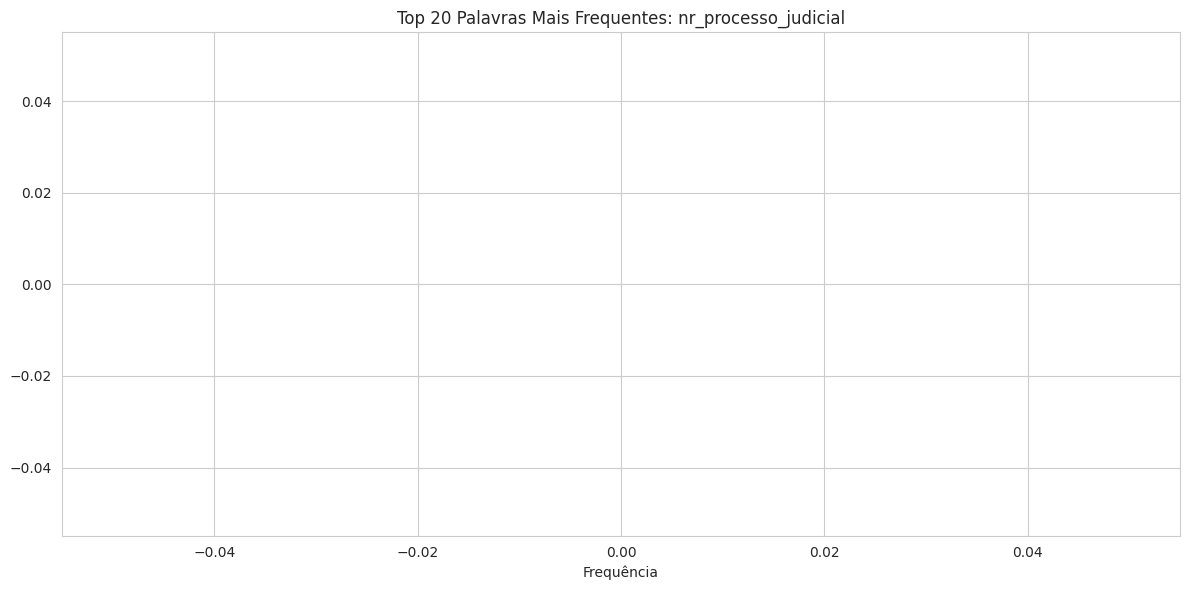


🔤 Palavras Mais Frequentes: nm_arquivo
--------------------------------------------------------------------------------


,Palavra,Frequência
0,pdf,114613
1,doc,44666
2,inicial,38623
3,doença,19632
4,silva,16729
5,maria,12061
6,por,9077
7,petição,8600
8,docx,7789
9,auxilio,6926


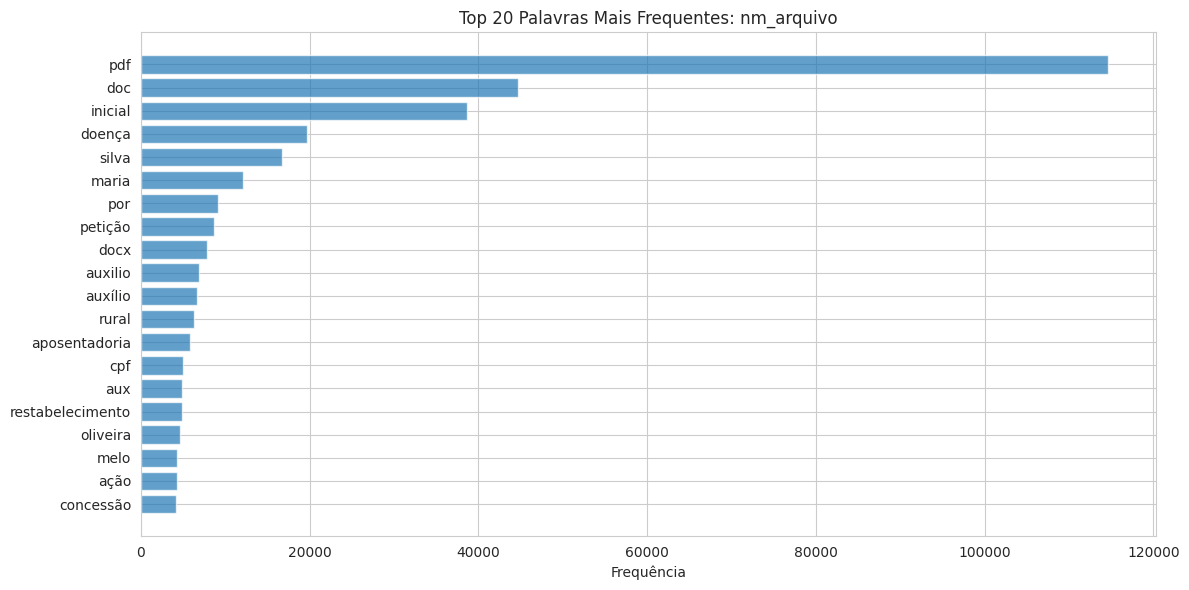


🔤 Palavras Mais Frequentes: dt_inclusao
--------------------------------------------------------------------------------


,Palavra,Frequência


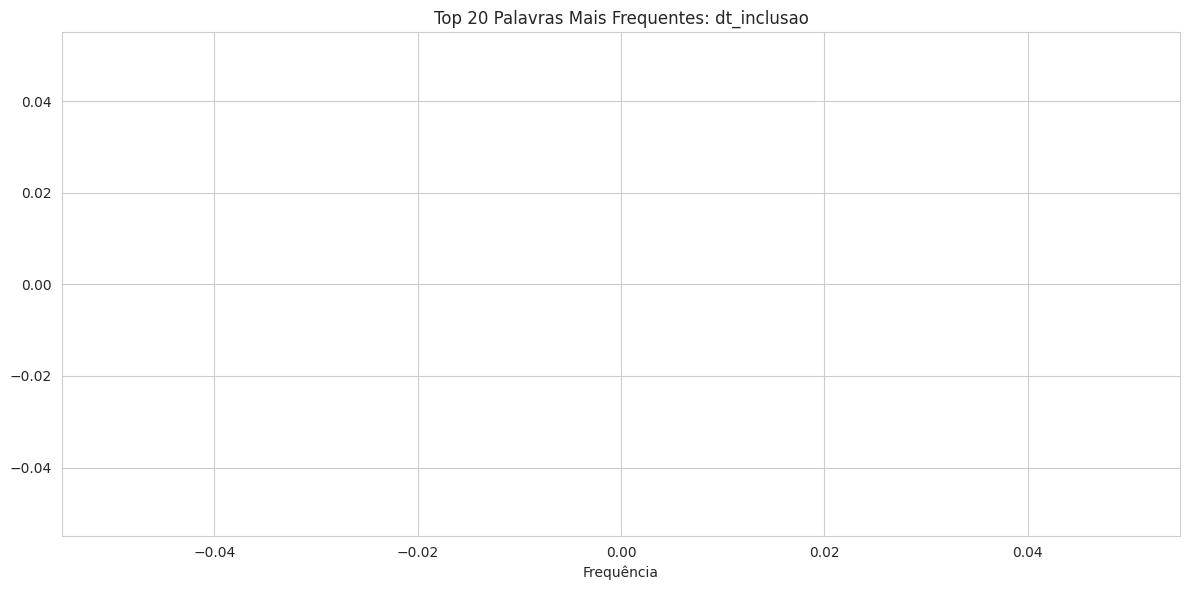


🔤 Palavras Mais Frequentes: texto_limpo
--------------------------------------------------------------------------------


,Palavra,Frequência
0,que,6952749
1,para,3155535
2,por,3072973
3,com,3028763
4,não,2477437
5,lei,2044870
6,dos,1837529
7,art,1738369
8,benefício,1660978
9,direito,1235240


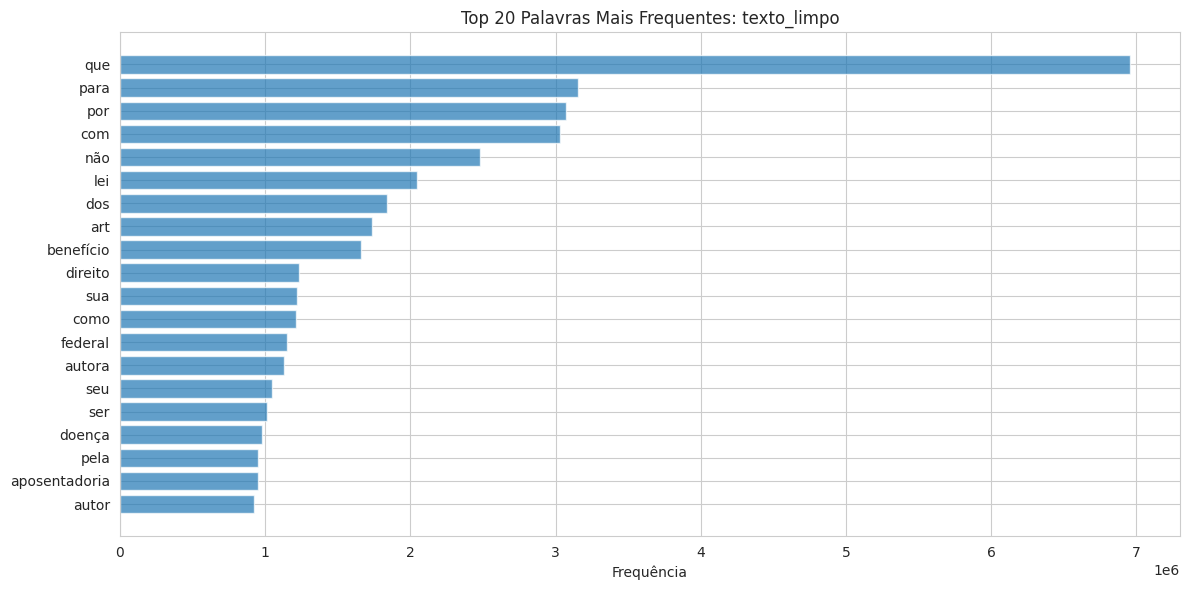

In [22]:
# Análise de palavras mais frequentes
from collections import Counter
import re

if var_types['texto']:
    for col in var_types['texto']:
        print(f"\n🔤 Palavras Mais Frequentes: {col}")
        print("-"*80)

        # Concatenar todos os textos
        all_text = ' '.join(df[col].astype(str).values)

        # Extrair palavras (apenas letras, mínimo 3 caracteres)
        words = re.findall(r'\b[a-záàâãéèêíïóôõöúçñ]{3,}\b', all_text.lower())

        # Contar palavras
        word_counts = Counter(words)

        # Top 20 palavras
        top_words = pd.DataFrame(word_counts.most_common(20),
                                columns=['Palavra', 'Frequência'])

        display(top_words)

        # Gráfico de barras
        plt.figure(figsize=(12, 6))
        plt.barh(top_words['Palavra'][::-1], top_words['Frequência'][::-1], alpha=0.7)
        plt.xlabel('Frequência')
        plt.title(f'Top 20 Palavras Mais Frequentes: {col}')
        plt.tight_layout()
        plt.show()

## 11. Relatório de Preparação para Redes Neurais

In [23]:
# Gerar relatório de preparação
print("\n" + "="*80)
print("RELATÓRIO DE PREPARAÇÃO PARA TREINAMENTO DE REDES NEURAIS")
print("="*80)

print(f"\n📊 RESUMO DO DATASET")
print(f"  • Total de registros: {len(df):,}")
print(f"  • Total de features: {df.shape[1]}")
print(f"  • Duplicatas: {duplicates:,}")

print(f"\n🔢 VARIÁVEIS NUMÉRICAS ({len(var_types['numericas'])})")
if var_types['numericas']:
    for var in var_types['numericas']:
        print(f"  • {var}")
    print("\n  Recomendações:")
    print("    - Normalizar/Padronizar antes do treinamento")
    print("    - Verificar outliers e decidir tratamento")
    print("    - Analisar correlações para feature engineering")

print(f"\n📋 VARIÁVEIS CATEGÓRICAS ({len(var_types['categoricas'])})")
if var_types['categoricas']:
    for var in var_types['categoricas']:
        n_unique = df[var].nunique()
        print(f"  • {var} ({n_unique} categorias únicas)")
    print("\n  Recomendações:")
    print("    - One-Hot Encoding para baixa cardinalidade (<10 categorias)")
    print("    - Label Encoding ou Embedding para alta cardinalidade")
    print("    - Considerar Target Encoding se houver variável alvo")

print(f"\n📝 CAMPOS DE TEXTO ({len(var_types['texto'])})")
if var_types['texto']:
    for var in var_types['texto']:
        print(f"  • {var}")
    print("\n  Recomendações:")
    print("    - TF-IDF ou Word Embeddings (Word2Vec, GloVe)")
    print("    - BERT/Transformers para contexto semântico")
    print("    - Pré-processamento: remoção de stopwords, stemming/lemmatization")

print(f"\n⚠️ PROBLEMAS IDENTIFICADOS")
issues = []
if not missing_analysis.empty:
    issues.append(f"  • Valores ausentes em {len(missing_analysis)} colunas")
if duplicates > 0:
    issues.append(f"  • {duplicates:,} registros duplicados")

if issues:
    for issue in issues:
        print(issue)
else:
    print("  ✅ Nenhum problema crítico detectado")

print(f"\n🎯 PRÓXIMOS PASSOS")
print("  1. Tratamento de valores ausentes (imputação ou remoção)")
print("  2. Codificação de variáveis categóricas")
print("  3. Processamento de texto (tokenização, vetorização)")
print("  4. Normalização de features numéricas")
print("  5. Split train/validation/test")
print("  6. Feature engineering se necessário")
print("  7. Definição da arquitetura da rede neural")


RELATÓRIO DE PREPARAÇÃO PARA TREINAMENTO DE REDES NEURAIS

📊 RESUMO DO DATASET
  • Total de registros: 165,499
  • Total de features: 28
  • Duplicatas: 0

🔢 VARIÁVEIS NUMÉRICAS (6)
  • index
  • id_processo_judicial
  • id_perito
  • vara
  • triagem_peticao
  • tamanho_texto

  Recomendações:
    - Normalizar/Padronizar antes do treinamento
    - Verificar outliers e decidir tratamento
    - Analisar correlações para feature engineering

📋 VARIÁVEIS CATEGÓRICAS (18)
  • dt_primeira_distribuicao (2474 categorias únicas)
  • in_tutela_antecipada (2 categorias únicas)
  • nm_juizado (9 categorias únicas)
  • ds_cidade (6 categorias únicas)
  • codigo_assunto (8 categorias únicas)
  • ds_assunto_judicial (8 categorias únicas)
  • ds_complemento_assunto_judicial (59 categorias únicas)
  • detalhe_assunto_1 (268 categorias únicas)
  • detalhe_assunto_2 (339 categorias únicas)
  • ds_especialidade (2 categorias únicas)
  • ds_complemento_especialidade (8 categorias únicas)
  • ds_status_pe

## 12. Exportar Dados para Análise Posterior

In [31]:
# Salvar dados em CSV para análise posterior
output_path = r"/gdrive/MyDrive/Colab Notebooks/Doutorado/cnn-classificador-peticoes/dados_exportados.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"\n✅ Dados exportados com sucesso para: {output_path}")


✅ Dados exportados com sucesso para: /gdrive/MyDrive/Colab Notebooks/Doutorado/cnn-classificador-peticoes/dados_exportados.csv


In [32]:
import json

# Ensure 'Tipo_Dado' column is converted to string for JSON serialization
missing_values_for_report = []
if not missing_analysis.empty:
    # Create a copy to avoid SettingWithCopyWarning and convert 'Tipo_Dado' to string
    temp_missing_analysis = missing_analysis.copy()
    temp_missing_analysis['Tipo_Dado'] = temp_missing_analysis['Tipo_Dado'].astype(str)
    missing_values_for_report = temp_missing_analysis.to_dict('records')

report = {
    'dataset_info': {
        'total_rows': len(df),
        'total_columns': df.shape[1],
        'duplicates': int(duplicates)
    },
    'variable_types': var_types,
    'missing_values': missing_values_for_report
}

report_path = r"/gdrive/MyDrive/Colab Notebooks/Doutorado/cnn-classificador-peticoes/analise_relatorio.json"
with open(report_path, 'w', encoding='utf-8') as f:
    json.dump(report, f, indent=2, ensure_ascii=False)

print(f"\n✅ Relatório salvo em: {report_path}")


✅ Relatório salvo em: /gdrive/MyDrive/Colab Notebooks/Doutorado/cnn-classificador-peticoes/analise_relatorio.json


## 13. Fechar Conexão com o Banco de Dados

In [33]:
# Fechar conexão
if conn:
    conn.close()
    print("\n✅ Conexão com o banco de dados fechada com sucesso!")


✅ Conexão com o banco de dados fechada com sucesso!


---

## Conclusão

Este notebook realizou uma análise exploratória completa dos dados SQLite3, incluindo:

- ✅ Conexão e exploração da estrutura do banco
- ✅ Análise de qualidade dos dados (valores ausentes, duplicatas)
- ✅ Classificação automática de variáveis (numéricas, categóricas, texto)
- ✅ Análise estatística detalhada de cada tipo de variável
- ✅ Visualizações para melhor compreensão dos dados
- ✅ Recomendações para pré-processamento e treinamento de redes neurais

Os dados estão prontos para as próximas etapas de preparação e modelagem!